
# 📂 Fase 1: Limpieza y Preparación de Datos

Este cuaderno tiene como objetivo principal realizar una serie de pasos de preprocesamiento sobre un conjunto de datos. El preprocesamiento es una fase crítica en cualquier proyecto de análisis de datos o aprendizaje automático, ya que garantiza que los datos estén limpios, estructurados y listos para ser utilizados en modelos o visualizaciones posteriores.

A lo largo de este notebook, se desarrollarán tareas que van desde la carga y exploración de datos hasta la limpieza y transformación de los mismos. Cada sección incluirá una introducción que explique su propósito y una breve conclusión que resuma lo realizado.

---




Carga, limpieza y transformación de los datos de las campañas de márketing para su análisis.

## Importamos las bibliotecas necesarias

*En este cuaderno, importaremos diversas bibliotecas de Python que nos ayudarán en tareas de análisis de datos, visualización, modelado estadístico y manipulación de datos geoespaciales. Estas herramientas son fundamentales para realizar un preprocesamiento completo y efectivo de los datos de marketing.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from difflib import get_close_matches
import os

## 📂 <u> Carga de los datos <u>

En esta sección realizaremos la importación y carga inicial del conjunto de datos de campañas de marketing. Este paso es fundamental ya que constituye la base para todas las operaciones posteriores de análisis y preprocesamiento.

La carga de datos incluye la lectura del archivo CSV fuente, la identificación del formato de los datos, y una primera inspección de la estructura general del conjunto de datos, lo que nos permitirá planificar los pasos de limpieza y transformación necesarios.

In [2]:
df = pd.read_csv("../data/marketingcampaigns.csv", on_bad_lines='skip')

## <u> Visualización y primer análisis de los datos <u>

En esta sección realizaremos un análisis exploratorio inicial de los datos para comprender mejor su estructura, distribución y características principales. Este análisis nos permitirá identificar patrones, tendencias y posibles problemas que deberán ser abordados en las etapas posteriores del preprocesamiento.

La visualización de datos es una herramienta fundamental que nos ayudará a interpretar de manera más intuitiva la información contenida en nuestro conjunto de datos, facilitando la toma de decisiones sobre las transformaciones necesarias a realizar.

In [3]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [4]:
df.tail(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.3,social media,B2B,organic,0.5,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.2,50000.0
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.6,webinar,B2B,paid,0.7,90000.0
1031,Too many conversions,2023-05-01,2023-11-01,40000,0.8,social media,B2C,organic,1.5,120000.0


In [5]:
df.shape

(1032, 10)

In [6]:
df.columns

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [8]:
df.describe()

,roi,conversion_rate,revenue
count,1028.000000,1028.000000,1029.000000
mean,0.533804,0.541936,511591.195277
std,0.261869,0.267353,287292.729847
min,-0.200000,0.000000,108.210000
25%,0.310000,0.300000,267820.250000
50%,0.530000,0.550000,518001.770000
75%,0.760000,0.770000,765775.140000
max,0.990000,1.500000,999712.490000


In [9]:
df.describe(include='all')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
count,1032,1031,1030,1029,1028.000000,1031,1030,1031,1028.000000,1029.000000
unique,1014,347,347,1011,NaN,6,3,4,NaN,NaN
top,User-friendly client-driven service-desk,2023-04-01,2023-10-09,8082.3,NaN,email,B2B,promotion,NaN,NaN
freq,3,9,9,4,NaN,288,529,280,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.533804,NaN,NaN,NaN,0.541936,511591.195277
std,NaN,NaN,NaN,NaN,0.261869,NaN,NaN,NaN,0.267353,287292.729847
min,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,0.000000,108.210000
25%,NaN,NaN,NaN,NaN,0.310000,NaN,NaN,NaN,0.300000,267820.250000
50%,NaN,NaN,NaN,NaN,0.530000,NaN,NaN,NaN,0.550000,518001.770000
75%,NaN,NaN,NaN,NaN,0.760000,NaN,NaN,NaN,0.770000,765775.140000


In [10]:
print(df.dtypes)

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object


## 📊 <u>Visualización de los datos nulos</u> 

En esta sección, analizaremos la presencia de valores nulos en el conjunto de datos de campañas de marketing. La identificación de valores faltantes es un paso crucial en el preprocesamiento de datos, ya que estos pueden afectar significativamente los resultados de análisis posteriores.

Utilizaremos métodos visuales y cuantitativos para detectar los valores nulos, lo que nos permitirá tomar decisiones informadas sobre cómo manejarlos, ya sea mediante su eliminación, imputación o sustitución por valores predeterminados, dependiendo de la naturaleza de los datos y su importancia en el análisis global.

In [11]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

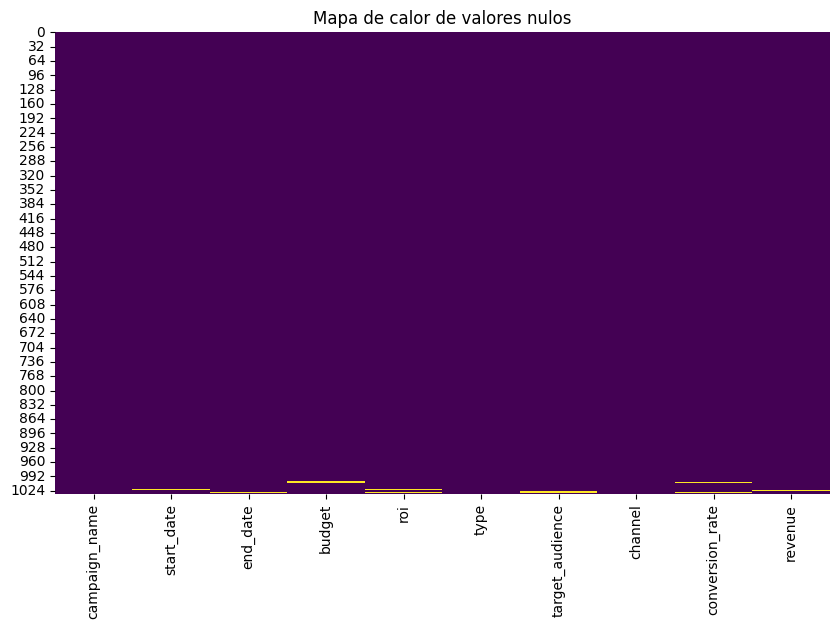

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores nulos")
plt.show()

*Se detectan cambios necesarios en el tipo de datos por columnas como las relativas a las fechas que están configuradas como objetos, al igual que el budget.*

### <u>Creación de un nuevo Dataframe para empezar a tratar y limpiar los datos

In [13]:
df2 = df.copy()

### <u>Tratamiento de los datos

### Convertir las fechas, sin formato estricto

In [14]:

df2['start_date'] = pd.to_datetime(df2['start_date'], errors='coerce')
df2['end_date'] = pd.to_datetime(df2['end_date'], errors='coerce')

In [15]:
print(df.dtypes)

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object


#### Medias relativas a las fechas:

In [16]:
mean_start_date = df2['start_date'].mean()
mean_start_date

Timestamp('2023-01-30 14:19:14.518950144')

In [17]:
mean_end_date = df2['end_date'].mean()
mean_end_date

Timestamp('2024-01-30 01:05:46.355685120')

In [18]:
average_campaign_duration = (mean_end_date - mean_start_date).days
average_campaign_duration

364

## <u>Gestión de los valores nulos

#### Rellenar start_date nulo con end_date - 364 días

In [19]:
df2.loc[df2['start_date'].isna(), 'start_date'] = df2['end_date'] - pd.Timedelta(days=180)

In [20]:
df2['type'].fillna('Not available', inplace=True)
df2['start_date'].fillna(df2['end_date'] - pd.Timedelta(days=364), inplace=True)
df2['end_date'].fillna(df2['start_date'] + pd.Timedelta(days=364), inplace=True)
df2['target_audience'].fillna('Not available', inplace=True)
df2['conversion_rate'].fillna(0, inplace=True)
df2['revenue'].fillna(0, inplace=True)

In [21]:
df2.isnull().sum()

campaign_name      0
start_date         1
end_date           1
budget             3
roi                4
type               0
target_audience    0
channel            1
conversion_rate    0
revenue            0
dtype: int64

#### Identificamos los nulos restantes relativos a la 'start_date' y al 'end_date'. Coinciden en la misma línea con lo que no podemos elegir uno de ellos como referencia para calcular el otro. Calculamos la fecha media para cada uno de ellos y la asignamos a los valores nulos

In [22]:
df2[df2['start_date'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1006,Typo in Date,NaT,NaT,50000.0,0.65,webinar,B2C,promotion,0.9,320000.0


In [23]:
df2['start_date'].fillna(df2['start_date'].mean(), inplace=True)
df2['end_date'].fillna(df2['end_date'].mean(), inplace=True)

In [24]:
df2[df2['start_date'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue


#### Eliminamos el único nulo de la columna 'channel' ya que no hay ni end_date (lo hemos calculado nosotros), ni budget, ni roi, ni conversion_rate, ni revenue asociados a la campaña.

In [25]:
df[df['channel'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1024,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN


In [26]:
df2 = df2.dropna(subset=['channel'])

#### Verificamos que no haya más nulos o valores restantes

In [27]:
df2.isnull().sum()/ len(df) * 100

campaign_name      0.000000
start_date         0.000000
end_date           0.000000
budget             0.193798
roi                0.290698
type               0.000000
target_audience    0.000000
channel            0.000000
conversion_rate    0.000000
revenue            0.000000
dtype: float64

*Para reemplazar los valores nulos de ROI esperaremos a dar el formato correcto a 'budget' y a 'revenue' para poder calcular los valores restantes de ROI*

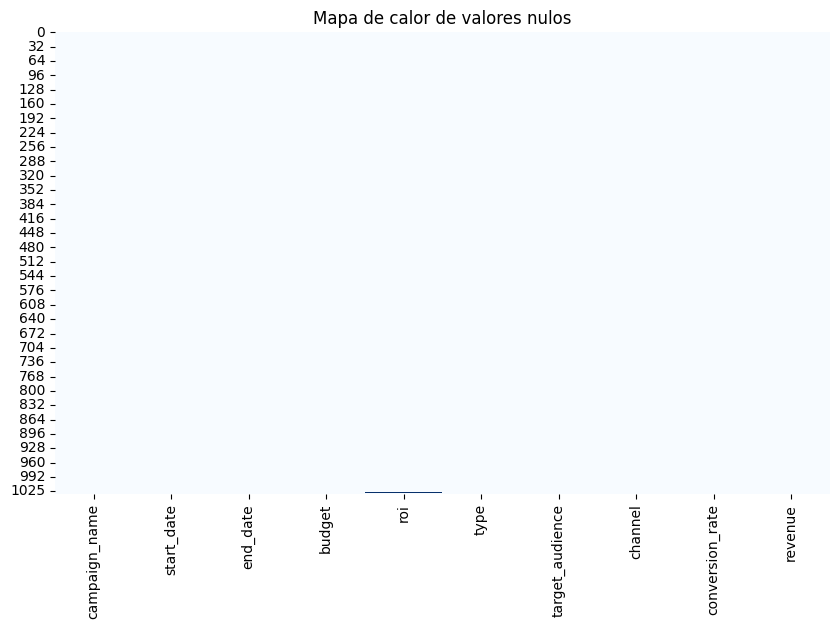

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='Blues')
plt.title("Mapa de calor de valores nulos")
plt.xticks(rotation=90)
plt.show()

In [29]:
df2.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


#### Añadimos la columna 'campaign_duration' para saber cuántos días ha durado cada campaña

In [30]:
# 2. Calcular la duración en días solo para filas válidas
df2['campaign_duration'] = (df2['end_date'] - df2['start_date']).dt.days

In [31]:
# 3. Calcular la media de duración excluyendo NaN
mean_duration = df2['campaign_duration'].mean()

# 4. Rellenar start_date donde falte, usando end_date - media duración
mask_missing_start = df2['start_date'].isna() & df2['end_date'].notna()
df2.loc[mask_missing_start, 'start_date'] = df2.loc[mask_missing_start, 'end_date'] - pd.to_timedelta(mean_duration, unit='d')



#### Asignamos el tipo de dato correcto a cada columna incorrecta

#### Budget

*Se detectan cambios necesarios en el tipo de datos. Budget contiene datos erroneos, formato incorrecto (obect) y tiene valores nulos.*

In [32]:
str_values_in_budget = df2[df2['budget'].apply(lambda x: isinstance(x, str))]
print(str_values_in_budget['budget'])

0         8082.3
1       17712.98
2        84643.1
3       14589.75
4        39291.9
          ...   
1027       20000
1028      100000
1029         abc
1030       60000
1031       40000
Name: budget, Length: 1029, dtype: object


In [33]:
valor_nulo = df2[df2['budget'] == 'abc']
print(valor_nulo)

       campaign_name start_date   end_date budget  roi   type target_audience  \
1029  Invalid budget 2022-12-01 2023-06-01    abc  NaN  email             B2C   

        channel  conversion_rate  revenue  campaign_duration  
1029  promotion              0.2  50000.0                182  


In [34]:
df2['budget'] = df2['budget'].replace('abc', '0')
df2['budget'] = df2['budget'].astype(float)

In [35]:
budget_median = df2['budget'].median()

*Sustituimos los valores nulos por la mediana de 'budget'*

In [36]:
df2['budget'].fillna(budget_median, inplace=True)

In [37]:
df2[df2['budget'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration


In [38]:
budget_zero = df2[df2['budget'] == 0]
print(budget_zero)

       campaign_name start_date   end_date  budget  roi   type  \
1029  Invalid budget 2022-12-01 2023-06-01     0.0  NaN  email   

     target_audience    channel  conversion_rate  revenue  campaign_duration  
1029             B2C  promotion              0.2  50000.0                182  


In [39]:
# Replace both string and numeric zero values with the budget median
df2['budget'] = df2['budget'].replace(['0.0', '0', 0], budget_median)

# Verify that we've replaced all zeros
zero_budget_records = df2[df2['budget'] == 0]
print(f"Records with zero budget after replacement: {len(zero_budget_records)}")

Records with zero budget after replacement: 0


In [40]:
budget_zero_zero = df2[df2['budget'] == 0]
print(budget_zero_zero)

Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue, campaign_duration]
Index: []


#### Verificamos los valores de ROI

*Los valores de ROI no son fiables y recalculamos la columna entera en una nueva columna 'calculated_roi'*

In [41]:
df2['calculated_roi'] = (((df2['revenue'] - df2['budget']) / df2['budget']) * 100).round(2)
df2['roi_comparison'] = np.where(df2['roi'] == df2['calculated_roi'], 'Equal', 'Different')
df2['roi_comparison'].value_counts()

roi_comparison
Different    1031
Name: count, dtype: int64

In [42]:
df2[['campaign_name', 'roi', 'calculated_roi', 'roi_comparison']].head(10)

,campaign_name,roi,calculated_roi,roi_comparison
0,Public-key multi-tasking throughput,0.35,8679.60,Different
1,De-engineered analyzing task-force,0.74,2816.56,Different
2,Balanced solution-oriented Local Area Network,0.37,441.36,Different
3,Distributed real-time methodology,0.47,516.59,Different
4,Front-line executive infrastructure,0.30,20.92,Different
5,Upgradable transitional data-warehouse,0.59,638.80,Different
6,Innovative context-sensitive framework,0.59,496.88,Different
7,User-friendly client-driven service-desk,0.40,460.43,Different
8,Proactive neutral methodology,0.16,1714.49,Different
9,Intuitive responsive support,0.81,30913.88,Different


In [43]:
roi_negative = 0
roi_positive = 0
for index, row in df2.iterrows():
    if row['calculated_roi'] < 0:
        roi_negative += 1
    elif row['calculated_roi'] > 0:
        roi_positive += 1
print(f"ROI negativo: {roi_negative}")
print(f"ROI positivo: {roi_positive}")

ROI negativo: 45
ROI positivo: 986


In [44]:
df2.nlargest(15, 'calculated_roi')[['campaign_name', 'calculated_roi', 'budget', 'revenue']]

,campaign_name,calculated_roi,budget,revenue
252,Persevering zero administration interface,88475.90,1052.57,932323.35
887,Synchronized national system engine,62700.71,1223.82,768567.70
835,Enhanced optimizing time-frame,62489.35,1378.61,862862.99
361,Automated dedicated budgetary management,61262.18,1436.99,881768.44
492,Advanced systematic complexity,52727.47,1873.52,989733.25
473,Profit-focused actuating open architecture,52442.64,1480.67,777983.15
702,Object-based intermediate attitude,32370.59,2698.11,876092.32
742,Inverse transitional artificial intelligence,32197.08,2667.65,861573.13
9,Intuitive responsive support,30913.88,1816.22,563280.30
1018,Intuitive responsive support,30913.88,1816.22,563280.30


In [45]:
df2['revenue'].describe()

count      1031.000000
mean     510598.777827
std      287895.928227
min           0.000000
25%      267157.655000
50%      517886.300000
75%      765182.735000
max      999712.490000
Name: revenue, dtype: float64

*Constatamos que 'calculated_roi' tiene valores negativos*

In [46]:
# Get rows where calculated_roi is negative
negative_roi_campaigns = df2[df2['calculated_roi'] < 0]

# Display the results with relevant columns
print(f"Number of campaigns with negative ROI: {len(negative_roi_campaigns)}")
negative_roi_campaigns[['campaign_name', 'budget', 'revenue', 'calculated_roi', 'campaign_duration', 'channel', 'type']]

Number of campaigns with negative ROI: 45


,campaign_name,budget,revenue,calculated_roi,campaign_duration,channel,type
14,Innovative web-enabled function,36848.30,4190.95,-88.63,304,referral,webinar
24,Horizontal hybrid instruction set,48366.50,41004.95,-15.22,698,promotion,social media
28,Seamless clear-thinking product,99838.63,14073.59,-85.90,321,organic,email
60,Persevering web-enabled workforce,79220.80,29575.48,-62.67,194,paid,social media
83,Reverse-engineered foreground approach,52125.20,27754.76,-46.75,361,referral,webinar
202,Focused responsive open architecture,91490.92,38601.99,-57.81,445,referral,webinar
240,Decentralized incremental synergy,78742.39,10253.30,-86.98,98,referral,social media
256,Grass-roots reciprocal core,85249.47,34642.19,-59.36,438,paid,social media
267,Re-contextualized regional pricing structure,93497.40,58328.00,-37.62,469,promotion,email
269,Reactive client-driven paradigm,63250.91,32045.66,-49.34,176,paid,email


In [47]:
print(df2['calculated_roi'].unique())

[8.67960e+03 2.81656e+03 4.41360e+02 ... 5.00000e+01 2.00000e+02
 6.56000e+00]


In [48]:
df2['calculated_roi'].value_counts().sum()

np.int64(1031)

*Verificación de valores nulos*

In [49]:
df2[df2['calculated_roi'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,calculated_roi,roi_comparison


In [50]:
df2[df2['calculated_roi'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,calculated_roi,roi_comparison


Sustitución del valor 'inf' por '0' al tratarse de una división por 0

In [51]:
print(df2['calculated_roi'].unique())

[8.67960e+03 2.81656e+03 4.41360e+02 ... 5.00000e+01 2.00000e+02
 6.56000e+00]


In [52]:
valor_inf = df2[df2['calculated_roi'] == np.inf]
print(valor_inf)

Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue, campaign_duration, calculated_roi, roi_comparison]
Index: []


In [53]:
df2['calculated_roi'] = df2['calculated_roi'].replace([float('inf'), -float('inf')], 0)

In [54]:
print(df2['calculated_roi'].unique())

[8.67960e+03 2.81656e+03 4.41360e+02 ... 5.00000e+01 2.00000e+02
 6.56000e+00]


*Damos el formato float a la columna crada 'campaign_duration*

In [55]:
df2['campaign_duration'] = df2['campaign_duration'].astype(float)

In [56]:
print(df2.dtypes)

campaign_name                object
start_date           datetime64[ns]
end_date             datetime64[ns]
budget                      float64
roi                         float64
type                         object
target_audience              object
channel                      object
conversion_rate             float64
revenue                     float64
campaign_duration           float64
calculated_roi              float64
roi_comparison               object
dtype: object


In [57]:
df2['campaign_duration'] = (df2['end_date'] - df2['start_date']).dt.days

average_campaign_duration = df2['campaign_duration'].mean()
print(f"Average Campaign Duration: {average_campaign_duration:.2f} days")

Average Campaign Duration: 364.24 days


#### Identificación y eliminación de los datos duplicados

In [58]:
initial_rows = len(df2)
initial_rows

1031

In [59]:
df2.duplicated().sum()

np.int64(15)

In [60]:
df2[df2.duplicated()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,calculated_roi,roi_comparison
1000,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,328,8679.60,Different
1001,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295,441.36,Different
1002,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366,516.59,Different
1009,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,328,8679.60,Different
1010,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,432,2816.56,Different
1011,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295,441.36,Different
1012,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366,516.59,Different
1013,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,313,20.92,Different
1014,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11,167,638.80,Different
1015,Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59,359,496.88,Different


In [61]:
df2 = df2.drop_duplicates()

In [62]:
df2.duplicated().sum()

np.int64(0)

*Identificar duplicados parciales*

In [63]:
partial_duplicates = df2[df2.duplicated(subset='campaign_name', keep=False)].sort_values(by='campaign_name', ascending=True)
partial_duplicates

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,calculated_roi,roi_comparison
203,Reverse-engineered static infrastructure,2023-07-26,2024-05-29,12246.32,0.48,email,B2B,referral,0.44,987205.29,308,7961.24,Different
985,Reverse-engineered static infrastructure,2023-07-16,2023-08-07,7315.35,0.86,email,B2C,referral,0.70,162798.55,22,2125.44,Different
5,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11,167,638.80,Different
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,46919.95,0.59,social media,B2C,referral,0.67,558302.11,167,1089.90,Different
7,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,webinar,B2C,promotion,0.52,206241.46,339,460.43,Different
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,Not available,B2C,promotion,0.52,206241.46,339,460.43,Different


In [64]:
valor_duplicado = df2[(df2['campaign_name'] == 'User-friendly client-driven service-desk') & (df2['type'] == 'Not available')]
valor_duplicado

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,calculated_roi,roi_comparison
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,Not available,B2C,promotion,0.52,206241.46,339,460.43,Different


In [65]:
# Obtener los índices directamente de las condiciones
indices_a_eliminar = df2[
    ((df2['campaign_name'] == 'User-friendly client-driven service-desk') & (df2['type'] == 'Not available'))
].index

# Eliminar usando estos índices
df2 = df2.drop(indices_a_eliminar)

In [66]:
# Verificar que no hemos perdido información valiosa
print("Rangos de valores después de eliminar duplicados:")
for col in ['budget', 'calculated_roi', 'revenue']:
    print(f"{col}: min={df2[col].min():.2f}, max={df2[col].max():.2f}, mean={df2[col].mean():.2f}, median={df2[col].median():.2f}")

Rangos de valores después de eliminar duplicados:
budget: min=-10000.00, max=9999999.00, mean=59249.68, median=47196.25
calculated_roi: min=-100.00, max=88475.90, mean=2467.43, median=941.17
revenue: min=0.00, max=999712.49, mean=512635.44, median=519790.34


*Eliminación de los duplicados parciales*

In [67]:
final_rows = len(df2)
print(f"Filas eliminadas: {initial_rows - final_rows}")
print(f"Porcentaje de reducción: {(initial_rows - final_rows) / initial_rows * 100:.2f}%")

Filas eliminadas: 16
Porcentaje de reducción: 1.55%


Consistencia en los formatos de 'roi', 'conversion_rate', 'budget' y 'revenue'

In [68]:
df2['calculated_roi'] = df2['calculated_roi'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
df2['conversion_rate'] = df2['conversion_rate'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
df2['revenue'] = df2['revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
df2['budget'] = df2['budget'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)

In [69]:
print(df2['calculated_roi'].unique())

[8.67960e+03 2.81656e+03 4.41360e+02 ... 5.00000e+01 2.00000e+02
 6.56000e+00]


In [70]:
def verificar_rangos_coherentes(df2):
    print("Verificando coherencia de rangos:")
    
    # Para cada columna numérica
    for col in df2.select_dtypes(include=['float', 'int']).columns:
        min_val = df2[col].min()
        max_val = df2[col].max()
        mean_val = df2[col].mean()
        median_val = df2[col].median()
        
        print(f"{col}: min={min_val}, max={max_val}, mean={mean_val}, median={median_val}")
        
        # Añadir reglas de verificación específicas por columna
        if col == 'conversion_rate' and max_val > 1:
            print(f"  ⚠️ Advertencia: {col} tiene valores mayores a 1, podría no estar normalizado")
            
        if col == 'calculated_roi' and max_val > 1000:
            print(f"  ⚠️ Advertencia: {col} tiene valores extremos: {max_val}, podría necesitar tratamiento")
            
        if col == 'budget' and min_val <= 0:
            print(f"  ⚠️ Advertencia: {col} tiene valores cero o negativos: {min_val}")
            
        if col == 'revenue' and min_val <= 0:
            print(f"  ⚠️ Advertencia: {col} tiene valores cero o negativos: {min_val}")
            
        if col == 'campaign_duration' and min_val < 0:
            print(f"  ⚠️ Advertencia: {col} tiene valores negativos: {min_val}, posible error en fechas")

# Ejecutar verificación general
verificar_rangos_coherentes(df2)

Verificando coherencia de rangos:
budget: min=-10000.0, max=9999999.0, mean=59249.67690640394, median=47196.25
  ⚠️ Advertencia: budget tiene valores cero o negativos: -10000.0
roi: min=-0.2, max=0.99, mean=0.5352173913043479, median=0.535
conversion_rate: min=0.0, max=1.5, mean=0.5417931034482759, median=0.55
  ⚠️ Advertencia: conversion_rate tiene valores mayores a 1, podría no estar normalizado
revenue: min=0.0, max=999712.49, mean=512635.4397142857, median=519790.34
  ⚠️ Advertencia: revenue tiene valores cero o negativos: 0.0
campaign_duration: min=-60, max=716, mean=364.6758620689655, median=364.0
  ⚠️ Advertencia: campaign_duration tiene valores negativos: -60, posible error en fechas
calculated_roi: min=-100.0, max=88475.9, mean=2467.43445320197, median=941.17
  ⚠️ Advertencia: calculated_roi tiene valores extremos: 88475.9, podría necesitar tratamiento


# Manejo de valores atípicos

In [71]:
# --- Detectar y manejar outliers usando IQR ---
def detect_outliers_iqr(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# --- Detectar y manejar outliers usando Z-score ---
from scipy.stats import zscore

def detect_outliers_zscore(df2, column, threshold=3):
    z_scores = zscore(df2[column])
    outliers = df2[(z_scores < -threshold) | (z_scores > threshold)]
    return outliers

# --- Análisis de 'budget' ---
budget_outliers_iqr, budget_lower, budget_upper = detect_outliers_iqr(df2, 'budget')
print(f"Outliers en 'budget' usando IQR: {len(budget_outliers_iqr)}")
print(f"Rango aceptable para 'budget': {budget_lower:.2f} - {budget_upper:.2f}")

budget_outliers_zscore = detect_outliers_zscore(df2, 'budget')
print(f"Outliers en 'budget' usando Z-score: {len(budget_outliers_zscore)}")

# --- Análisis de 'revenue' ---
revenue_outliers_iqr, revenue_lower, revenue_upper = detect_outliers_iqr(df2, 'revenue')
print(f"Outliers en 'revenue' usando IQR: {len(revenue_outliers_iqr)}")
print(f"Rango aceptable para 'revenue': {revenue_lower:.2f} - {revenue_upper:.2f}")

revenue_outliers_zscore = detect_outliers_zscore(df2, 'revenue')
print(f"Outliers en 'revenue' usando Z-score: {len(revenue_outliers_zscore)}")

# --- Análisis de 'calculated_roi' ---
calculated_roi_outliers_iqr, calculated_roi_lower, calculated_roi_upper = detect_outliers_iqr(df2, 'calculated_roi')
print(f"Outliers en 'calculated_roi' usando IQR: {len(calculated_roi_outliers_iqr)}")
print(f"Rango aceptable para 'calculated_roi': {calculated_roi_lower:.2f} - {calculated_roi_upper:.2f}")

calculated_roi_outliers_zscore = detect_outliers_zscore(df2, 'calculated_roi')
print(f"Outliers en 'calculated_roi' usando Z-score: {len(calculated_roi_outliers_zscore)}")

# --- Evaluar y manejar outliers ---
# Decidir si eliminar, transformar o mantener
def handle_outliers(df2, column, lower_bound, upper_bound, strategy='remove'):
    if strategy == 'remove':
        return df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    elif strategy == 'cap':
        df2[column] = df2[column].clip(lower=lower_bound, upper=upper_bound)
        return df2
    else:
        return df2

# Aplicar estrategia para 'budget'
df2 = handle_outliers(df2, 'budget', budget_lower, budget_upper, strategy='cap')

# Aplicar estrategia para 'revenue'
df2 = handle_outliers(df2, 'revenue', revenue_lower, revenue_upper, strategy='cap')

# Aplicar estrategia para 'calculated_roi'
df2 = handle_outliers(df2, 'calculated_roi', calculated_roi_lower, calculated_roi_upper, strategy='cap')

# --- Documentar el impacto ---
print("Impacto después de manejar outliers:")
print(df2[['budget', 'revenue', 'calculated_roi']].describe())

Outliers en 'budget' usando IQR: 1
Rango aceptable para 'budget': -49868.87 - 149725.25
Outliers en 'budget' usando Z-score: 1
Outliers en 'revenue' usando IQR: 0
Rango aceptable para 'revenue': -484488.23 - 1522552.17
Outliers en 'revenue' usando Z-score: 0
Outliers en 'calculated_roi' usando IQR: 116
Rango aceptable para 'calculated_roi': -1918.98 - 4350.78
Outliers en 'calculated_roi' usando Z-score: 15
Impacto después de manejar outliers:
              budget        revenue  calculated_roi
count    1015.000000    1015.000000     1015.000000
mean    49544.973704  512635.439714     1430.975596
std     28983.274679  288221.945009     1371.642510
min    -10000.000000       0.000000     -100.000000
25%     24978.925000  268151.920000      432.180000
50%     47196.250000  519790.340000      941.170000
75%     74877.455000  769912.020000     1999.620000
max    149725.250000  999712.490000     4350.780000



Análisis de outliers para 'budget'
Método: IQR (multiplicador=1.5)
Número de outliers detectados: 0
Porcentaje de outliers: 0.00%
Rango aceptable: -58095.08 - 163435.60


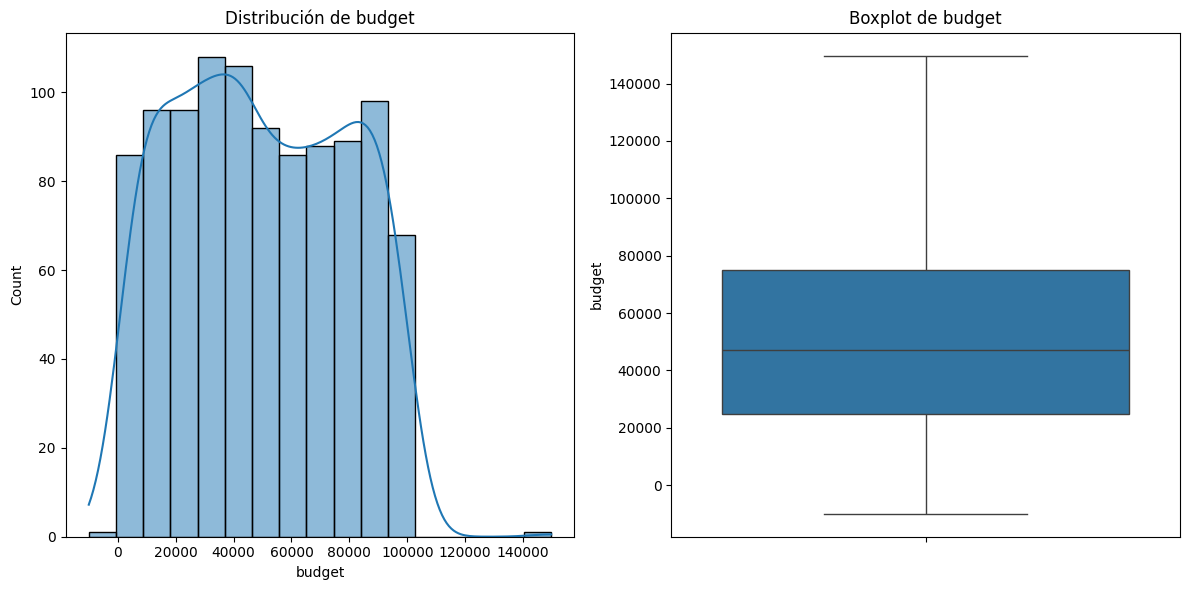


Impacto del tratamiento de outliers en 'budget':
Estrategia aplicada: cap
Registros antes: 1015, después: 1015
Media antes: 49544.97, después: 49544.97
Desviación estándar antes: 28983.27, después: 28983.27
Mín antes: -10000.00, después: -10000.00
Máx antes: 149725.25, después: 149725.25

Análisis de outliers para 'revenue'
Método: IQR (multiplicador=1.5)
Número de outliers detectados: 0
Porcentaje de outliers: 0.00%
Rango aceptable: -547434.89 - 1627463.27


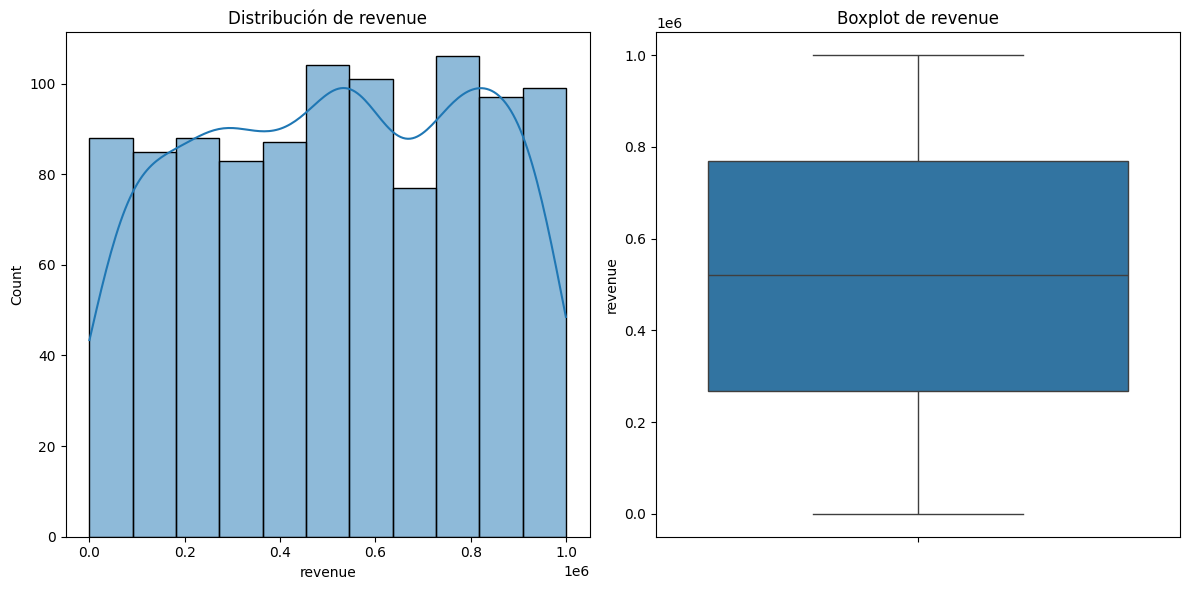


Impacto del tratamiento de outliers en 'revenue':
Estrategia aplicada: log
Registros antes: 1015, después: 1015
Media antes: 512635.44, después: 12.83
Desviación estándar antes: 288221.95, después: 1.14
Mín antes: 0.00, después: 0.00
Máx antes: 999712.49, después: 13.82

Análisis de outliers para 'calculated_roi'
Método: IQR (multiplicador=1.5)
Número de outliers detectados: 0
Porcentaje de outliers: 0.00%
Rango aceptable: -2700.95 - 5654.07


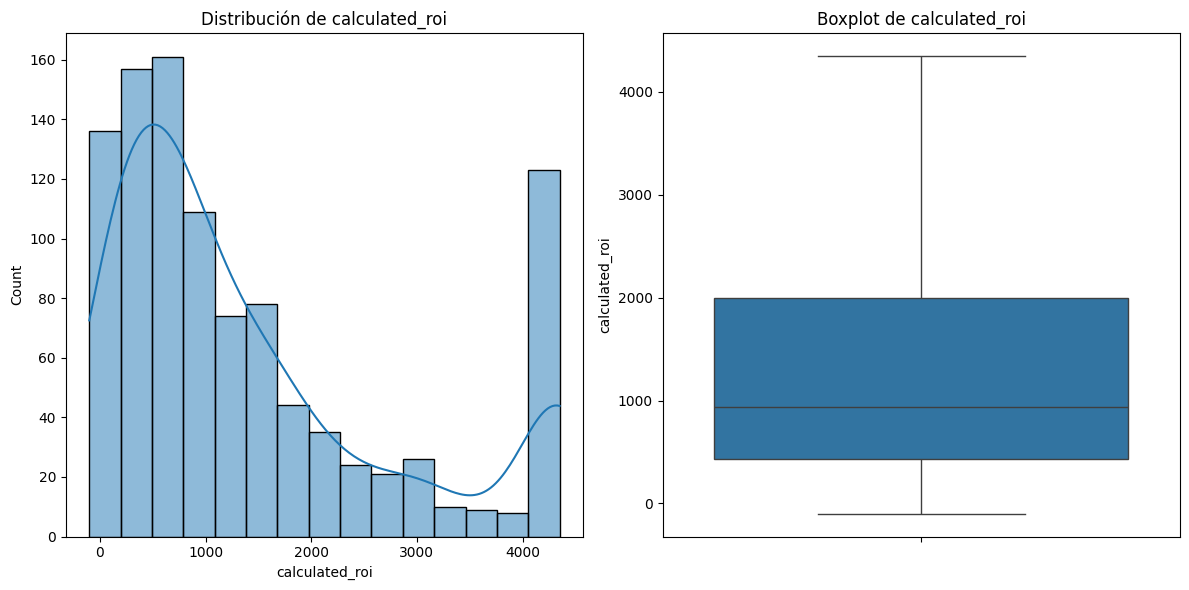


Impacto del tratamiento de outliers en 'calculated_roi':
Estrategia aplicada: cap
Registros antes: 1015, después: 1015
Media antes: 1430.98, después: 1430.98
Desviación estándar antes: 1371.64, después: 1371.64
Mín antes: -100.00, después: -100.00
Máx antes: 4350.78, después: 4350.78

Resumen final después del tratamiento de outliers:
              budget      revenue  calculated_roi
count    1015.000000  1015.000000     1015.000000
mean    49544.973704    12.830305     1430.975596
std     28983.274679     1.140507     1371.642510
min    -10000.000000     0.000000     -100.000000
25%     24978.925000    12.499312      432.180000
50%     47196.250000    13.161183      941.170000
75%     74877.455000    13.554033     1999.620000
max    149725.250000    13.815224     4350.780000


In [72]:
def detect_outliers_iqr(df2, column, multiplier=1.5):
    # Verificar si la columna existe
    if column not in df2.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Ignorar valores NaN
    valid_data = df2[df2[column].notna()]
    
    if len(valid_data) == 0:
        return pd.DataFrame(), np.nan, np.nan
    
    Q1 = valid_data[column].quantile(0.25)
    Q3 = valid_data[column].quantile(0.80)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound


def detect_outliers_zscore(df2, column, threshold=3):
    # Verificar si la columna existe
    if column not in df2.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Ignorar valores NaN para el cálculo del z-score
    valid_data = df2[df2[column].notna()]
    
    if len(valid_data) == 0:
        return pd.DataFrame()
    
    # Calcular z-scores solo en datos válidos
    column_data = valid_data[column].values
    z_scores = zscore(column_data, nan_policy='omit')
    
    # Crear una serie con los z-scores
    z_series = pd.Series(np.nan, index=df2.index)
    z_series.loc[valid_data.index] = z_scores
    
    # Identificar outliers
    outliers = df2[(abs(z_series) > threshold)]
    
    return outliers


def visualize_outliers(df2, column, outliers):
    plt.figure(figsize=(12, 6))
    
    # Distribución de datos
    plt.subplot(1, 2, 1)
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribución de {column}')
    
    # Boxplot con outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df2[column])
    plt.title(f'Boxplot de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar detalles de los outliers
    if not outliers.empty:
        print(f"\nDetalle de los outliers de {column}:")
        # Ordenar los outliers para facilitar su análisis
        sorted_outliers = outliers.sort_values(by=column)
        
        # Mostrar estadísticas descriptivas de los outliers
        print(f"\nEstadísticas de los outliers de {column}:")
        print(sorted_outliers[column].describe())


def handle_outliers(df2, column, lower_bound=None, upper_bound=None, strategy='cap', log_transform=False,
                  custom_value=None, quantile_transform=False):
    # Crear una copia del DataFrame para no modificar el original
    df2_result = df2.copy()
    
    # Verificar si la columna existe
    if column not in df2_result.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame")
    
    # Guardar el estado inicial para informar cambios
    initial_stats = {
        'count': len(df2_result),
        'mean': df2_result[column].mean(),
        'std': df2_result[column].std(),
        'min': df2_result[column].min(),
        'max': df2_result[column].max()
    }
    
    # Aplicar la estrategia seleccionada
    if strategy == 'remove':
        if lower_bound is not None and upper_bound is not None:
            df2_result = df2_result[(df2_result[column] >= lower_bound) & 
                                  (df2_result[column] <= upper_bound)]
        else:
            raise ValueError("Se necesitan los límites para eliminar los outliers")
            
    elif strategy == 'cap':
        if lower_bound is not None:
            df2_result[column] = df2_result[column].clip(lower=lower_bound)
        if upper_bound is not None:
            df2_result[column] = df2_result[column].clip(upper=upper_bound)
            
    elif strategy == 'custom' and custom_value is not None:
        if lower_bound is not None:
            df2_result.loc[df2_result[column] < lower_bound, column] = custom_value
        if upper_bound is not None:
            df2_result.loc[df2_result[column] > upper_bound, column] = custom_value
            
    elif strategy == 'log' or log_transform:
        # Asegurarse de que todos los valores son positivos
        min_val = df2_result[column].min()
        if min_val <= 0:
            offset = abs(min_val) + 1  # Añadir 1 para evitar log(0)
            df2_result[column] = df2_result[column] + offset
            
        # Aplicar transformación logarítmica
        df2_result[column + '_original'] = df2_result[column]  # Guardar valores originales
        df2_result[column] = np.log(df2_result[column])
        
    elif strategy == 'quantile' or quantile_transform:
        from sklearn.preprocessing import QuantileTransformer
        
        # Guardar valores originales
        df2_result[column + '_original'] = df2_result[column]
        
        # Aplicar transformación de cuantiles (más robusta a outliers)
        transformer = QuantileTransformer(output_distribution='normal')
        data = df2_result[column].values.reshape(-1, 1)
        df2_result[column] = transformer.fit_transform(data)
    
    # Calcular estadísticas después del tratamiento
    final_stats = {
        'count': len(df2_result),
        'mean': df2_result[column].mean(),
        'std': df2_result[column].std(),
        'min': df2_result[column].min(),
        'max': df2_result[column].max()
    }
    
    # Mostrar el impacto del tratamiento
    print(f"\nImpacto del tratamiento de outliers en '{column}':")
    print(f"Estrategia aplicada: {strategy}")
    print(f"Registros antes: {initial_stats['count']}, después: {final_stats['count']}")
    print(f"Media antes: {initial_stats['mean']:.2f}, después: {final_stats['mean']:.2f}")
    print(f"Desviación estándar antes: {initial_stats['std']:.2f}, después: {final_stats['std']:.2f}")
    print(f"Mín antes: {initial_stats['min']:.2f}, después: {final_stats['min']:.2f}")
    print(f"Máx antes: {initial_stats['max']:.2f}, después: {final_stats['max']:.2f}")
    
    return df2_result


def analyze_and_handle_outliers(df2, columns, method='iqr', threshold=3, multiplier=1.5, 
                              strategies=None):
    if strategies is None:
        strategies = {col: 'cap' for col in columns}
    
    df2_result = df2.copy()
    results = {}
    
    for column in columns:
        print(f"\n{'=' * 50}")
        print(f"Análisis de outliers para '{column}'")
        print(f"{'=' * 50}")
        
        if method == 'iqr':
            outliers, lower_bound, upper_bound = detect_outliers_iqr(df2_result, column, multiplier)
            print(f"Método: IQR (multiplicador={multiplier})")
        else:  # zscore
            outliers = detect_outliers_zscore(df2_result, column, threshold)
            lower_bound, upper_bound = None, None
            print(f"Método: Z-score (threshold={threshold})")
            
            # Para z-score, calcular también los límites equivalentes
            mean = df2_result[column].mean()
            std = df2_result[column].std()
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std
        
        print(f"Número de outliers detectados: {len(outliers)}")
        print(f"Porcentaje de outliers: {len(outliers) / len(df2_result) * 100:.2f}%")
        print(f"Rango aceptable: {lower_bound:.2f} - {upper_bound:.2f}")
        
        # Visualizar los outliers
        visualize_outliers(df2_result, column, outliers)
        
        # Aplicar la estrategia seleccionada
        strategy = strategies.get(column, 'cap')
        df2_result = handle_outliers(df2_result, column, lower_bound, upper_bound, strategy)
        
        # Guardar resultados
        results[column] = {
            'outliers': outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'strategy': strategy
        }
    
    return df2_result, results


if __name__ == "__main__":
    # Análisis y manejo de outliers para 'budget' y 'revenue'
    columns_to_analyze = ['budget', 'revenue', 'calculated_roi']
    
    # Definir estrategias personalizadas para cada columna
    strategies = {
        'budget': 'cap',       # Limitar valores extremos
        'revenue': 'log',       # Transformación logarítmica
        'calculated_roi': 'cap'  # Transformación logarítmica
    }
    
    # Análisis completo
    df2_processed, results = analyze_and_handle_outliers(
        df2, 
        columns_to_analyze,
        method='iqr',          # Método de detección ('iqr' o 'zscore')
        multiplier=1.5,        # Para IQR
        threshold=3,           # Para Z-score
        strategies=strategies  # Estrategias de manejo
    )
    
    # Mostrar resumen final
    print("\nResumen final después del tratamiento de outliers:")
    print(df2_processed[columns_to_analyze].describe())
    
    # Guardar resultados si es necesario
    # df2_processed.to_csv('datos_sin_outliers.csv', index=False)

In [73]:
df2['calculated_roi'].head(10)

0    4350.78
1    2816.56
2     441.36
3     516.59
4      20.92
5     638.80
6     496.88
7     460.43
8    1714.49
9    4350.78
Name: calculated_roi, dtype: float64

*Corrección de errores ortográficos*

In [74]:
# --- Función para corregir errores ortográficos ---
def correct_spelling(column, valid_values):
    corrected_column = column.apply(
        lambda x: get_close_matches(x, valid_values, n=1, cutoff=0.8)[0] if x in valid_values else x
    )
    return corrected_column

# --- Valores válidos para cada columna categórica ---
valid_channels = ['email', 'social media', 'podcast', 'webinar', 'event', 'organic', 'paid', 'referral', 'promotion']
valid_target_audiences = ['B2B', 'B2C']
valid_types = ['email', 'social media', 'webinar', 'podcast', 'event', 'promotion', 'organic', 'paid', 'referral']

# --- Corrección de errores en 'channel' ---
df2['channel'] = correct_spelling(df2['channel'], valid_channels)

# --- Corrección de errores en 'target_audience' ---
df2['target_audience'] = correct_spelling(df2['target_audience'], valid_target_audiences)

# --- Corrección de errores en 'type' ---
df2['type'] = correct_spelling(df2['type'], valid_types)

# --- Verificación de consistencia ---
print("\nVerificando consistencia después de las correcciones:")
print("Valores únicos en 'channel':", df2['channel'].unique())
print("Valores únicos en 'target_audience':", df2['target_audience'].unique())
print("Valores únicos en 'type':", df2['type'].unique())


Verificando consistencia después de las correcciones:
Valores únicos en 'channel': ['organic' 'promotion' 'paid' 'referral']
Valores únicos en 'target_audience': ['B2B' 'B2C' 'Not available']
Valores únicos en 'type': ['email' 'podcast' 'webinar' 'social media' 'event']


#### Creación de un Data Frame para separar los datos extraordinarios del calculated_roi

In [75]:
df3 = df2[df2['calculated_roi'] <= 4000].copy()

Eliminados 65 outliers de calculated_roi (7.31%)
Rango aceptable: -1053.20 - 2699.17


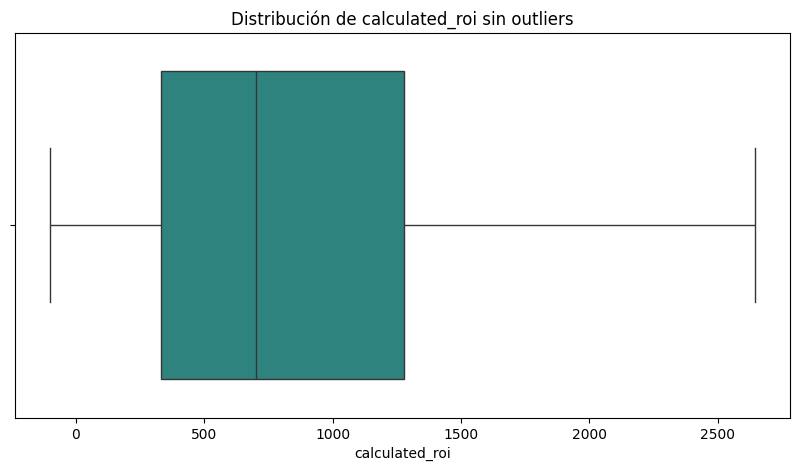

In [76]:
# Paso 1: Identificar mejor los outliers con el método IQR antes de crear df3_limpio
def remove_outliers_iqr(df3, column, multiplier=1.5):
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.70)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Crear un dataframe sin outliers
    df3_clean = df3[(df3[column] >= lower_bound) & (df3[column] <= upper_bound)].copy()
    
    # Informar sobre la cantidad de outliers eliminados
    outliers_count = len(df3) - len(df3_clean)
    print(f"Eliminados {outliers_count} outliers de {column} ({outliers_count/len(df3)*100:.2f}%)")
    print(f"Rango aceptable: {lower_bound:.2f} - {upper_bound:.2f}")
    
    return df3_clean

# Aplicar la función para crear df3_limpio directamente sin outliers
df3_limpio = remove_outliers_iqr(df3, 'calculated_roi', multiplier=1.5)

# Visualizar la distribución después de eliminar outliers para confirmar
plt.figure(figsize=(10, 5))
sns.boxplot(x=df3_limpio['calculated_roi'], palette='viridis')
plt.title('Distribución de calculated_roi sin outliers', fontsize=12)
plt.xlabel('calculated_roi')
plt.show()

In [77]:
df4 = df3[df3['target_audience'].isin(['B2B', 'B2C'])].copy()

### Creación de un Data Frame con los datos limpios

In [78]:
df_limpio = df4.copy()

*Visualización del Dataframe con los datos limpios*

In [79]:
print(df_limpio.columns)  # Verifica si 'budget' está en las columnas
print(df_limpio['budget'].isnull().sum())  # Verifica si hay valores nulos
print(df_limpio['budget'].dtype)  # Verifica el tipo de datos

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue',
       'campaign_duration', 'calculated_roi', 'roi_comparison'],
      dtype='object')
0
float64


In [80]:
total_budget = df_limpio['budget'].sum()
print(f"Total Budget: {total_budget:,.2f}")

Total Budget: 49,070,611.41


In [81]:
total_revenue = df_limpio['revenue'].sum()
print(f"Total Revenue: {total_revenue:,.2f}")

Total Revenue: 433,335,965.82


In [82]:
total_profit = total_revenue - total_budget
print(f"Total Profit: {total_profit:,.2f}")

Total Profit: 384,265,354.41


### Inserción de columnas adicionales

Añadimos la columna 'net_profit' para saber el balance de cada campaña

In [83]:
df_limpio['net_profit'] = df_limpio['revenue'] - df_limpio['budget']

In [84]:
df_limpio.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,campaign_duration,calculated_roi,roi_comparison,net_profit
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,432,2816.56,Different,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295,441.36,Different,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366,516.59,Different,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,313,20.92,Different,8219.45
5,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11,167,638.80,Different,482732.83


Añadir componentes de fecha

In [85]:
# Añadir componentes de fecha para start_date
df_limpio['start_month'] = df_limpio['start_date'].dt.month
df_limpio['start_month_name'] = df_limpio['start_date'].dt.month_name()
df_limpio['start_quarter'] = df_limpio['start_date'].dt.quarter
df_limpio['start_year'] = df_limpio['start_date'].dt.year

# Añadir componentes de fecha para end_date
df_limpio['end_month'] = df_limpio['end_date'].dt.month
df_limpio['end_month_name'] = df_limpio['end_date'].dt.month_name()
df_limpio['end_quarter'] = df_limpio['end_date'].dt.quarter
df_limpio['end_year'] = df_limpio['end_date'].dt.year

# Añadir día de la semana y trimestre para análisis estacional
df_limpio['start_day_of_week'] = df_limpio['start_date'].dt.day_name()
df_limpio['campaign_quarter'] = df_limpio['start_quarter'].astype(str) + 'Q' + df_limpio['start_year'].astype(str)

*Categorización de algunas variables*

In [86]:
# Convertir columnas a numérico
cols_to_convert = ['revenue', 'calculated_roi', 'budget', 'conversion_rate']
for col in cols_to_convert:
    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

# --- Revenue Category --- 
revenue_conditions = [
    (df_limpio['revenue'] <= 400000),
    (df_limpio['revenue'] > 400000) & (df_limpio['revenue'] <= 650000), # Corregido para no superponerse
    (df_limpio['revenue'] > 650000)
]
revenue_choices = [
    'low revenue',
    'medium revenue',
    'high revenue'
]
df_limpio['revenue_category'] = np.select(revenue_conditions, revenue_choices, default='unknown')

# --- calculated_roi Category --- 
calculated_roi_conditions = [
    (df_limpio['calculated_roi'] < 0.2),
    (df_limpio['calculated_roi'] >= 0.2) & (df_limpio['calculated_roi'] < 0.4),
    (df_limpio['calculated_roi'] >= 0.4) & (df_limpio['calculated_roi'] < 0.6),
    (df_limpio['calculated_roi'] >= 0.6) & (df_limpio['calculated_roi'] < 0.8),
    (df_limpio['calculated_roi'] >= 0.8)
]
calculated_roi_labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
df_limpio['calculated_roi_performance'] = np.select(calculated_roi_conditions, calculated_roi_labels, default='Desconocido')

# --- Budget Category --- 
budget_conditions = [
    (df_limpio['budget'] <= 30000),
    (df_limpio['budget'] > 30000) & (df_limpio['budget'] <= 50000), # Corregido para no superponerse
    (df_limpio['budget'] > 50000)
]
budget_choices = [
    'low budget',
    'medium budget',
    'high budget'
]
df_limpio['budget_category'] = np.select(budget_conditions, budget_choices, default='unknown')

# --- conversion_rate --- 
conversion_conditions = [
    (df_limpio['conversion_rate'] < 0.3),
    (df_limpio['conversion_rate'] >= 0.3) & (df_limpio['conversion_rate'] < 0.6),
    (df_limpio['conversion_rate'] >= 0.6) & (df_limpio['conversion_rate'] < 0.9),
    (df_limpio['conversion_rate'] >= 0.9)
]
conversion_labels = ['Baja', 'Media', 'Alta', 'Muy alta']
df_limpio['conversion_performance'] = np.select(conversion_conditions, conversion_labels, default='Desconocido')


In [87]:
# Verificar la distribución de las categorías
print("Distribución de revenue_category:")
print(df_limpio['revenue_category'].value_counts())
print("\nDistribución de calculated_roi_category:")
print(df_limpio['calculated_roi_performance'].value_counts())
print("\nDistribución de budget_category:")
print(df_limpio['budget_category'].value_counts())
print("\nDistribución de conversion_rate_category:")
print(df_limpio['conversion_performance'].value_counts())

Distribución de revenue_category:
revenue_category
low revenue       369
high revenue      293
medium revenue    225
Name: count, dtype: int64

Distribución de calculated_roi_category:
calculated_roi_performance
Muy alto    842
Muy bajo     45
Name: count, dtype: int64

Distribución de budget_category:
budget_category
high budget      483
medium budget    216
low budget       188
Name: count, dtype: int64

Distribución de conversion_rate_category:
conversion_performance
Alta        290
Media       280
Baja        213
Muy alta    104
Name: count, dtype: int64


Creación de Variables Derivadas

In [88]:
# Margen de beneficio
df_limpio['profit_margin'] = df_limpio['net_profit'] / df_limpio['revenue']

In [89]:
# Eficiencia de la campaña (revenue por día)
df_limpio['revenue_per_day'] = df_limpio['revenue'] / df_limpio['campaign_duration']

Variables binarias

In [90]:
# Flag para campañas rentables (ROI positivo)
df_limpio['is_profitable'] = np.where(df_limpio['calculated_roi'] > 0, 1, 0)

In [91]:
# Flag para campañas con alto rendimiento (ROI > 0.5)
df_limpio['is_high_performing'] = np.where(df_limpio['calculated_roi'] > 0.5, 1, 0)

In [92]:
# Flag para campañas estacionales (temporadas específicas)
holiday_months = [11, 12, 1] # Meses de temporada navideña y año nuevo
df_limpio['is_holiday_campaign'] = np.where(df_limpio['start_month'].isin(holiday_months), 1, 0)

In [93]:
# Flag para campañas cortas vs largas (usando la mediana como punto de corte)
median_duration = df_limpio['campaign_duration'].median()
df_limpio['is_long_campaign'] = np.where(df_limpio['campaign_duration'] > median_duration, 1, 0)


In [94]:
# Flag para campañas digitales vs tradicionales
digital_channels = ['email', 'social media', 'webinar', 'podcast', 'organic', 'paid']
df_limpio['is_digital'] = np.where(df_limpio['channel'].isin(digital_channels), 1, 0)

In [95]:
# Mostrar las primeras filas de las nuevas variables
print("\nPrimeras filas del DataFrame con las nuevas variables:")
nuevas_columnas = [
    'start_month', 'start_quarter', 'campaign_quarter', 
    'calculated_roi_performance', 'conversion_performance',
    'cost_per_conversion', 'profit_margin',
    'is_profitable', 'is_high_performing', 'is_holiday_campaign'
]
# Filtrar solo las columnas que existen en el DataFrame
nuevas_columnas_existentes = [col for col in nuevas_columnas if col in df_limpio.columns]

# Mostrar las primeras filas de las columnas existentes
print(df_limpio[nuevas_columnas_existentes].head())


Primeras filas del DataFrame con las nuevas variables:
   start_month  start_quarter campaign_quarter calculated_roi_performance  \
1            2              1           1Q2023                   Muy alto   
2           12              4           4Q2022                   Muy alto   
3            9              3           3Q2022                   Muy alto   
4            7              3           3Q2023                   Muy alto   
5            6              2           2Q2023                   Muy alto   

  conversion_performance  profit_margin  is_profitable  is_high_performing  \
1                   Alta       0.965713              1                   1   
2                   Baja       0.815281              1                   1   
3                   Baja       0.837817              1                   1   
4                   Alta       0.173000              1                   1   
5                   Alta       0.864644              1                   1   

   is_holida

In [96]:
df_limpio['cost_per_conversion'] = np.where(
    df_limpio['conversion_rate'] > 0,
    df_limpio['budget'] / (df_limpio['conversion_rate'] * 100),
    0
)

# Profit margin - evitando división por cero
df_limpio['profit_margin'] = np.where(
    df_limpio['revenue'] > 0,
    df_limpio['net_profit'] / df_limpio['revenue'],
    0  # Valor por defecto cuando revenue es 0
)

# Revenue per day - evitando división por cero
df_limpio['revenue_per_day'] = np.where(
    df_limpio['campaign_duration'] > 0,
    df_limpio['revenue'] / df_limpio['campaign_duration'],
    0  # Valor por defecto cuando campaign_duration es 0
)

print("\nAfter adding missing variables:")
print(df_limpio[['profit_margin', 'revenue_per_day', 'cost_per_conversion']].describe())


After adding missing variables:
       profit_margin  revenue_per_day  cost_per_conversion
count     887.000000       887.000000           887.000000
mean       -0.000805      1980.741173          1428.085382
std        19.263845      3991.121063          1359.000577
min      -571.757601         0.000000         -1000.000000
25%         0.781779       673.783484           595.279343
50%         0.885298      1310.918567           993.290278
75%         0.937773      2149.283577          1683.309982
max         0.975225     81467.228000          7709.058000


In [97]:
# Convertir fechas a formato corto (Y-M-D)
df_limpio['start_date'] = df_limpio['start_date'].dt.date
df_limpio['end_date'] = df_limpio['end_date'].dt.date

### Resumen

In [98]:
df_limpio[['budget', 'conversion_rate', 'calculated_roi', 'revenue']].describe()

,budget,conversion_rate,calculated_roi,revenue
count,887.000000,887.000000,887.000000,887.000000
mean,55321.997080,0.538940,1021.731026,488541.111409
std,26116.874752,0.268957,885.261149,287762.430690
min,-10000.000000,0.000000,-100.000000,0.000000
25%,33316.045000,0.300000,358.255000,249437.000000
50%,54468.410000,0.530000,771.820000,482042.700000
75%,78214.935000,0.770000,1507.015000,746017.975000
max,149725.250000,1.500000,3936.400000,999712.490000


In [99]:
df_limpio.describe(include='all')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,...,budget_category,conversion_performance,profit_margin,revenue_per_day,is_profitable,is_high_performing,is_holiday_campaign,is_long_campaign,is_digital,cost_per_conversion
count,887,887,887,887.000000,885.000000,887,887,887,887.000000,887.000000,...,887,887,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
unique,886,332,341,NaN,NaN,5,2,4,NaN,NaN,...,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Upgradable transitional data-warehouse,2023-07-02,2023-10-09,NaN,NaN,email,B2B,promotion,NaN,NaN,...,high budget,Alta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,8,8,NaN,NaN,249,448,235,NaN,NaN,...,483,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,55321.997080,0.538814,NaN,NaN,NaN,0.538940,488541.111409,...,NaN,NaN,-0.000805,1980.741173,0.949267,0.949267,0.250282,0.499436,0.475761,1428.085382
std,NaN,NaN,NaN,26116.874752,0.260453,NaN,NaN,NaN,0.268957,287762.430690,...,NaN,NaN,19.263845,3991.121063,0.219575,0.219575,0.433420,0.500282,0.499694,1359.000577
min,NaN,NaN,NaN,-10000.000000,-0.200000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,-571.757601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000
25%,NaN,NaN,NaN,33316.045000,0.320000,NaN,NaN,NaN,0.300000,249437.000000,...,NaN,NaN,0.781779,673.783484,1.000000,1.000000,0.000000,0.000000,0.000000,595.279343
50%,NaN,NaN,NaN,54468.410000,0.540000,NaN,NaN,NaN,0.530000,482042.700000,...,NaN,NaN,0.885298,1310.918567,1.000000,1.000000,0.000000,0.000000,0.000000,993.290278
75%,NaN,NaN,NaN,78214.935000,0.770000,NaN,NaN,NaN,0.770000,746017.975000,...,NaN,NaN,0.937773,2149.283577,1.000000,1.000000,0.500000,1.000000,1.000000,1683.309982


In [100]:
print(df_limpio.dtypes)

campaign_name                  object
start_date                     object
end_date                       object
budget                        float64
roi                           float64
type                           object
target_audience                object
channel                        object
conversion_rate               float64
revenue                       float64
campaign_duration               int64
calculated_roi                float64
roi_comparison                 object
net_profit                    float64
start_month                     int32
start_month_name               object
start_quarter                   int32
start_year                      int32
end_month                       int32
end_month_name                 object
end_quarter                     int32
end_year                        int32
start_day_of_week              object
campaign_quarter               object
revenue_category               object
calculated_roi_performance     object
budget_categ

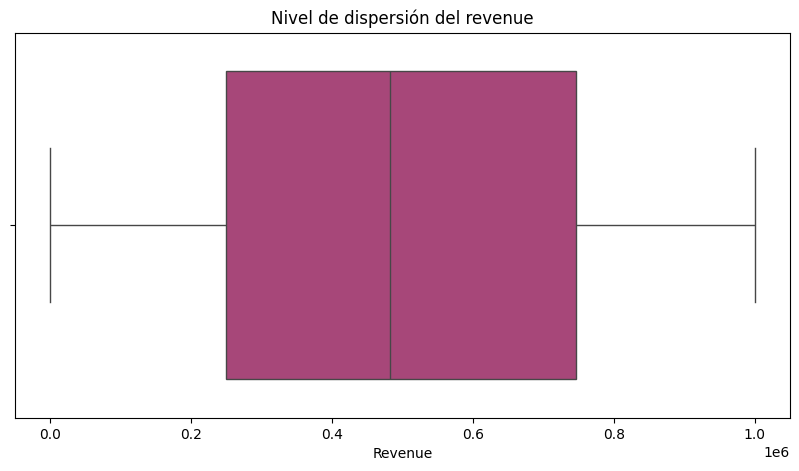

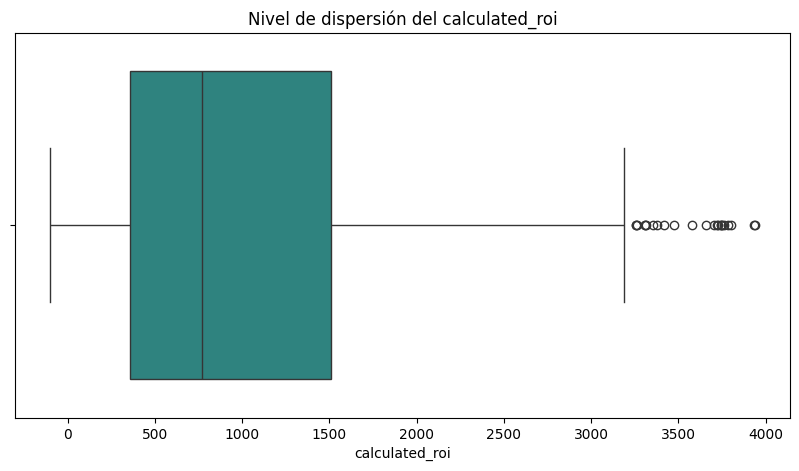

In [101]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['revenue'], palette='magma')
plt.title('Nivel de dispersión del revenue', fontsize=12)
plt.xlabel('Revenue')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['calculated_roi'], palette='viridis')
plt.title('Nivel de dispersión del calculated_roi', fontsize=12)
plt.xlabel('calculated_roi')
plt.show()

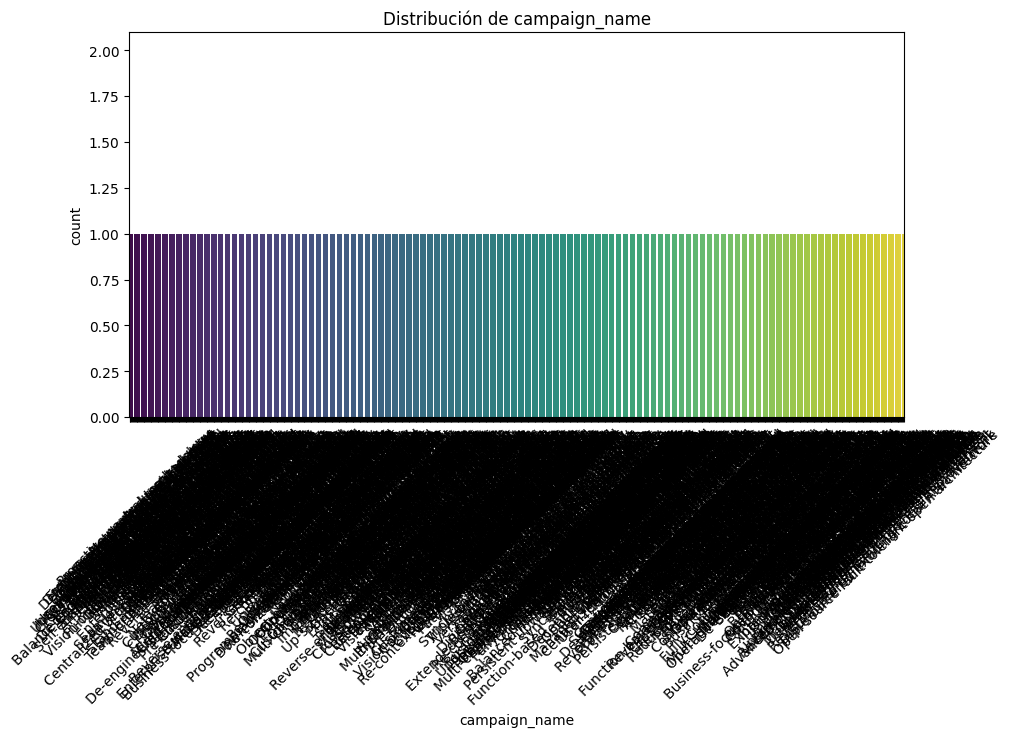

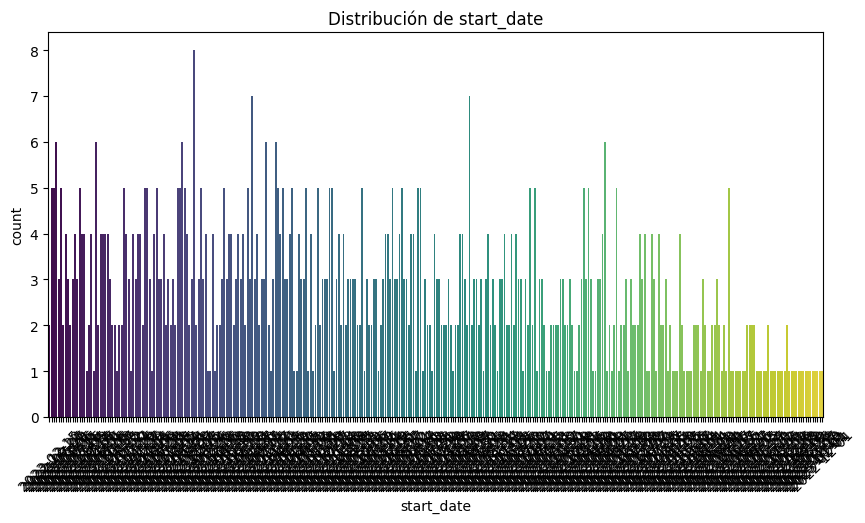

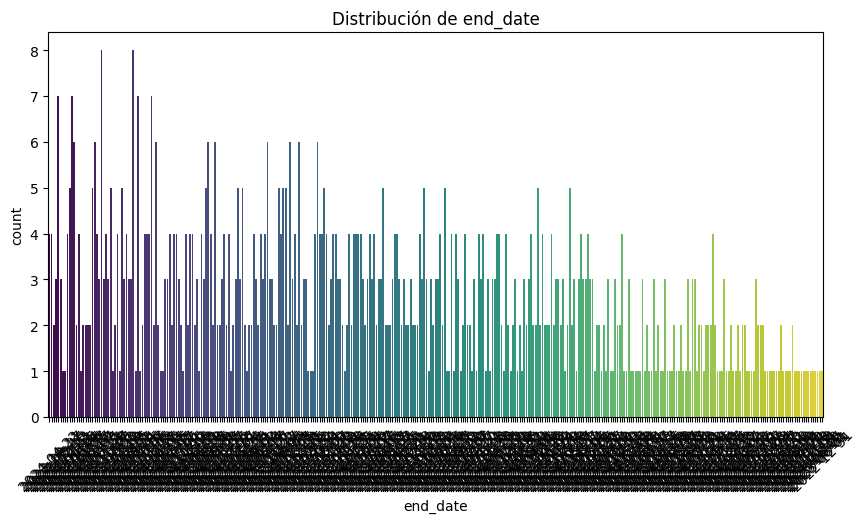

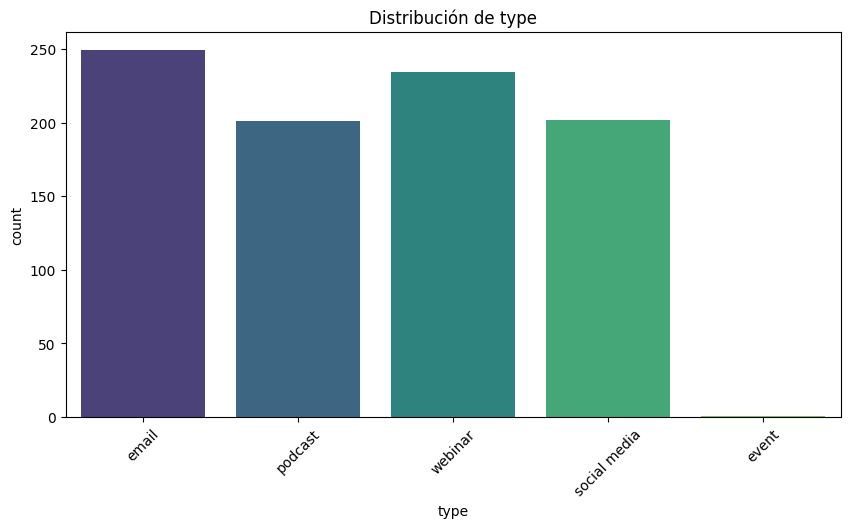

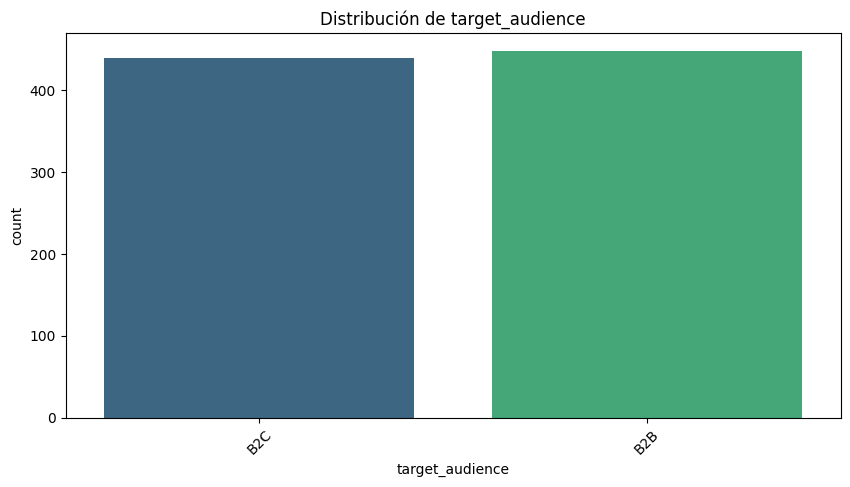

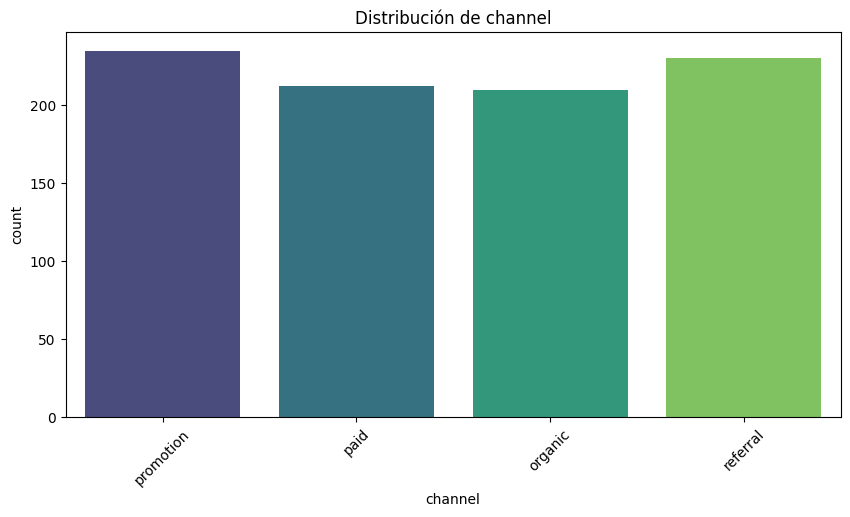

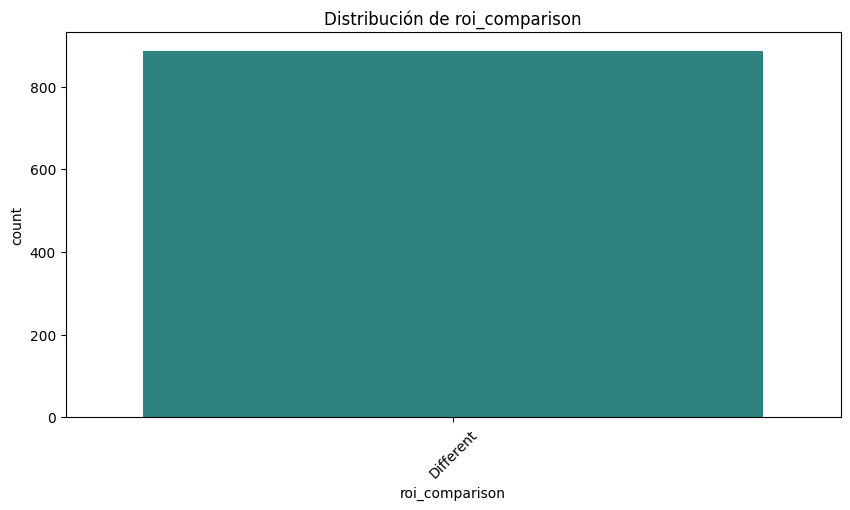

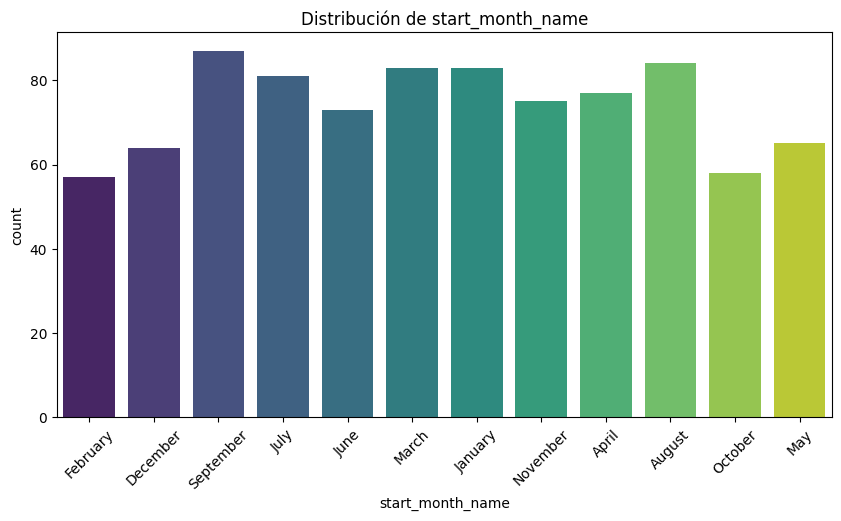

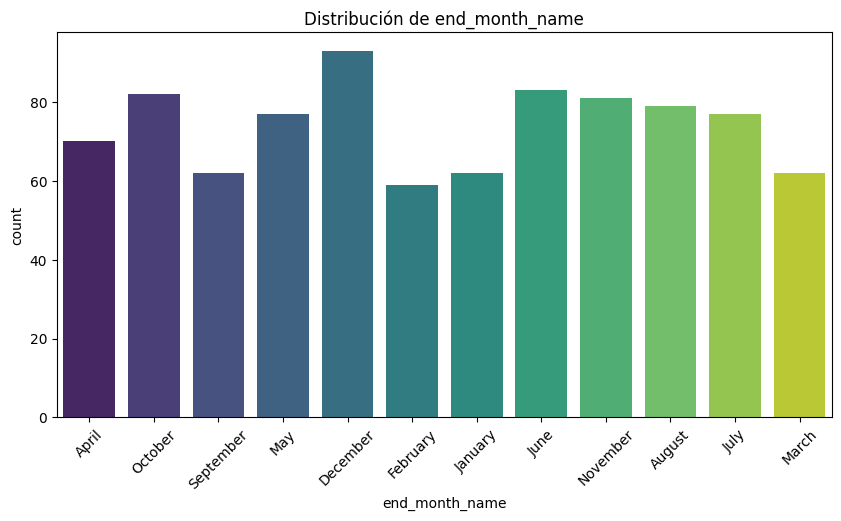

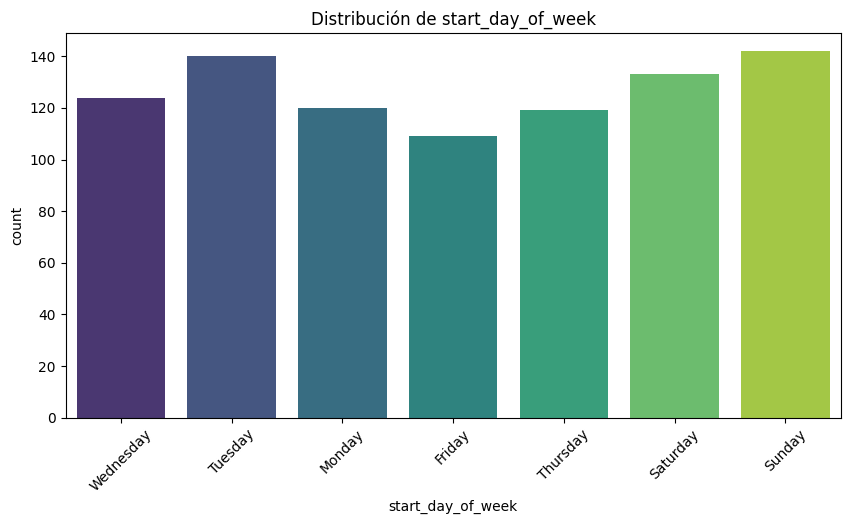

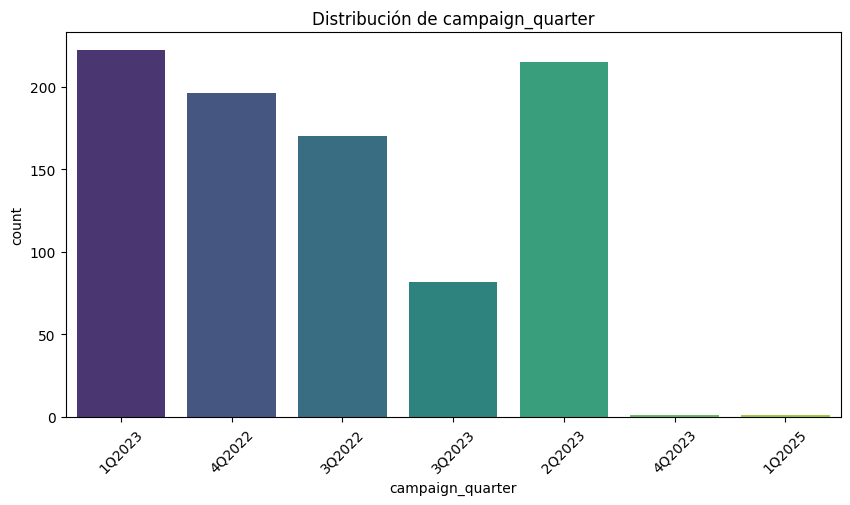

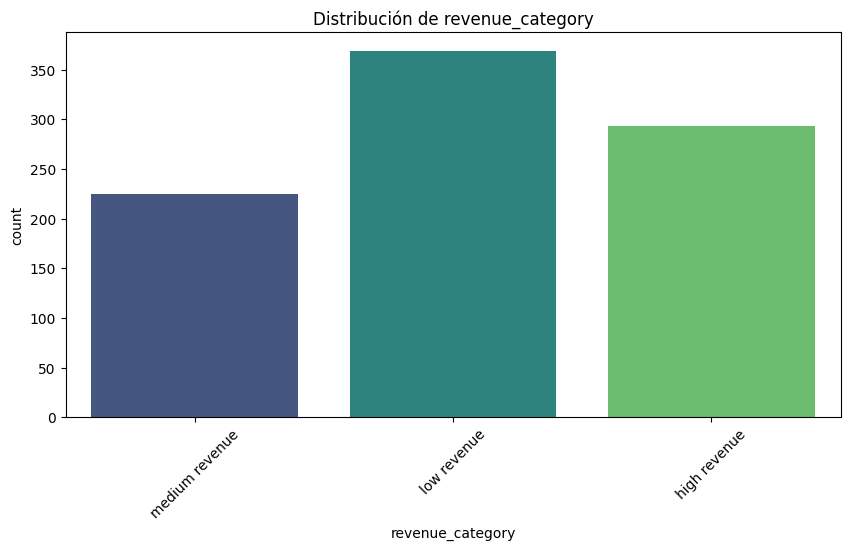

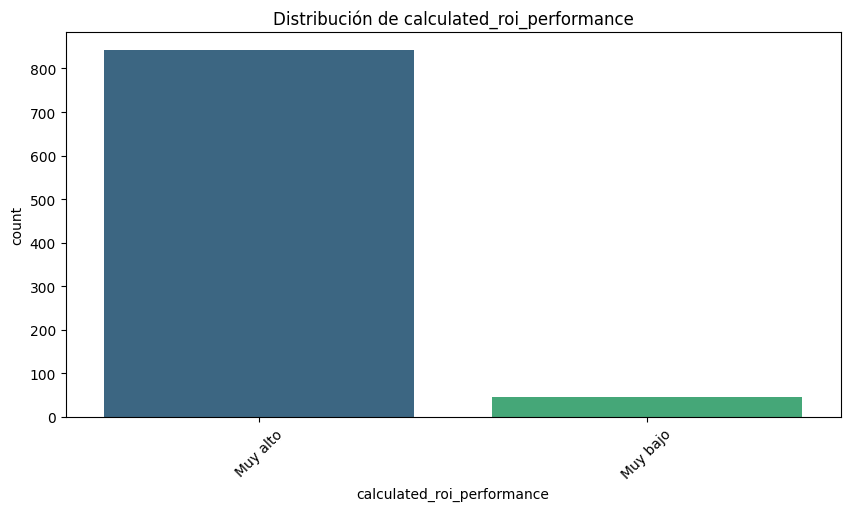

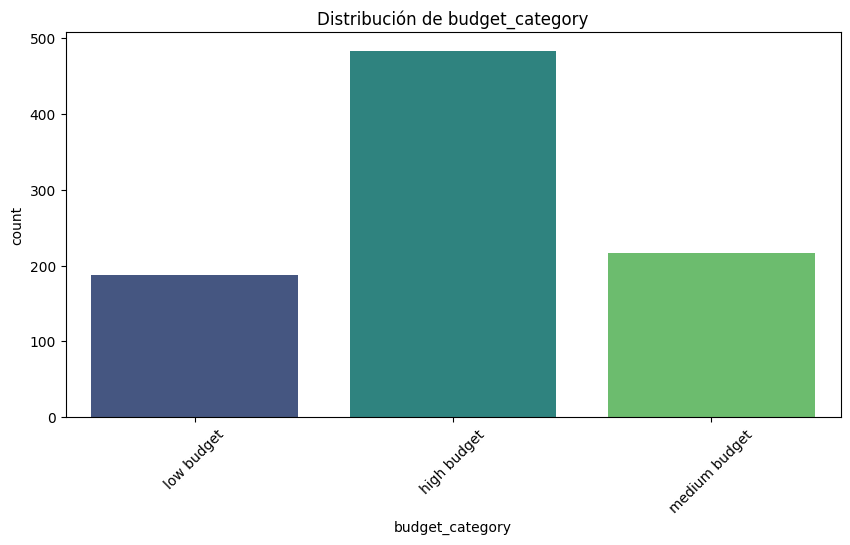

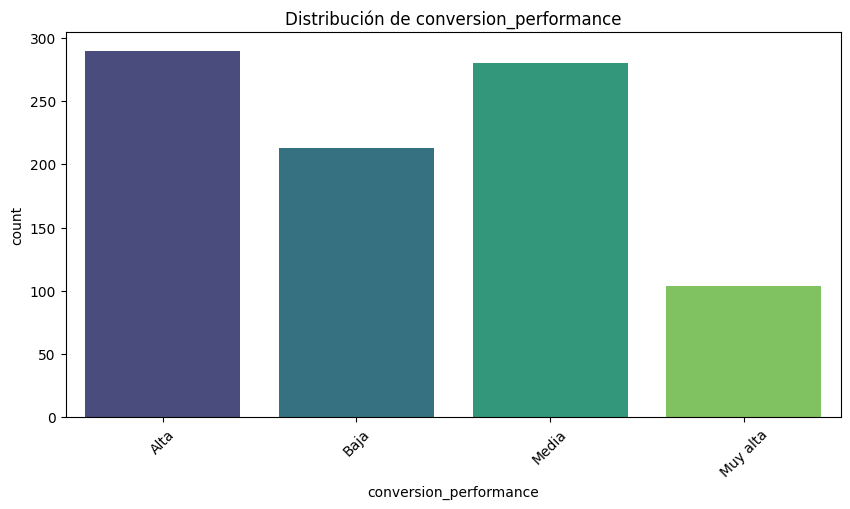

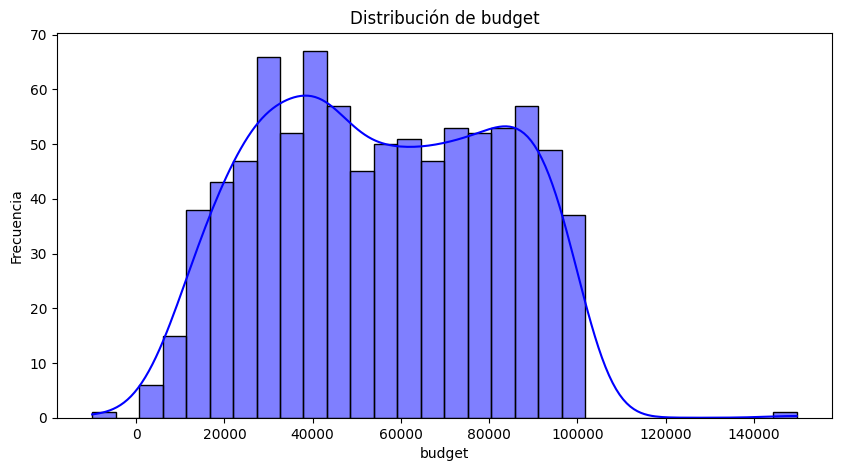

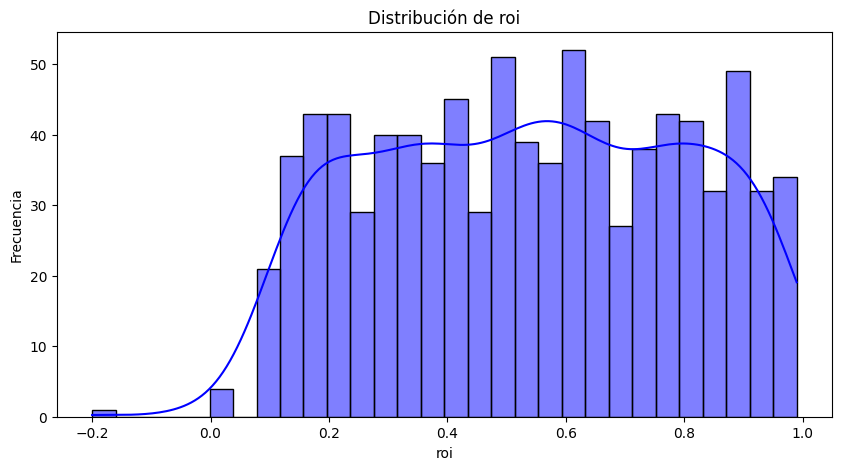

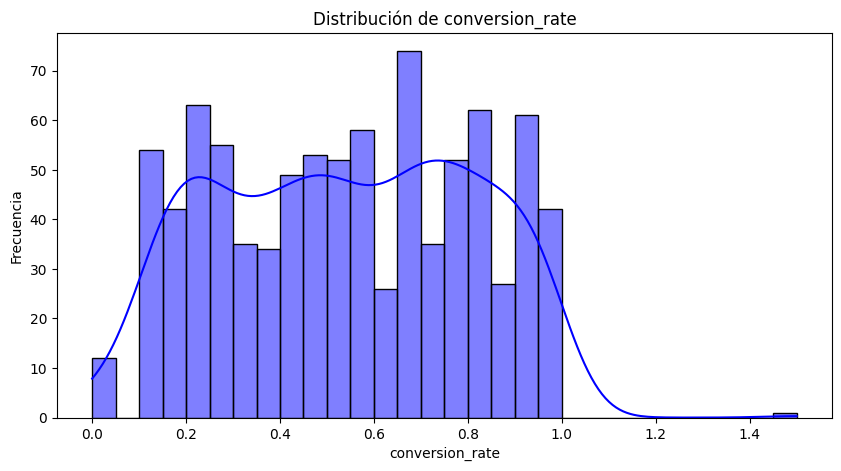

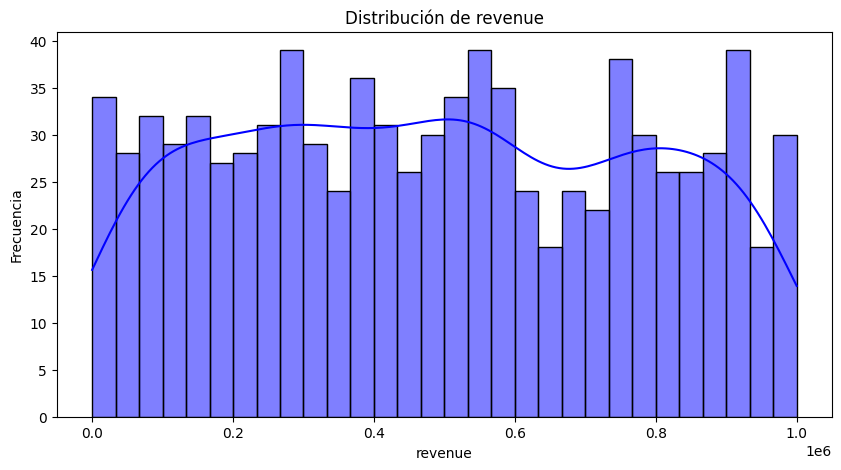

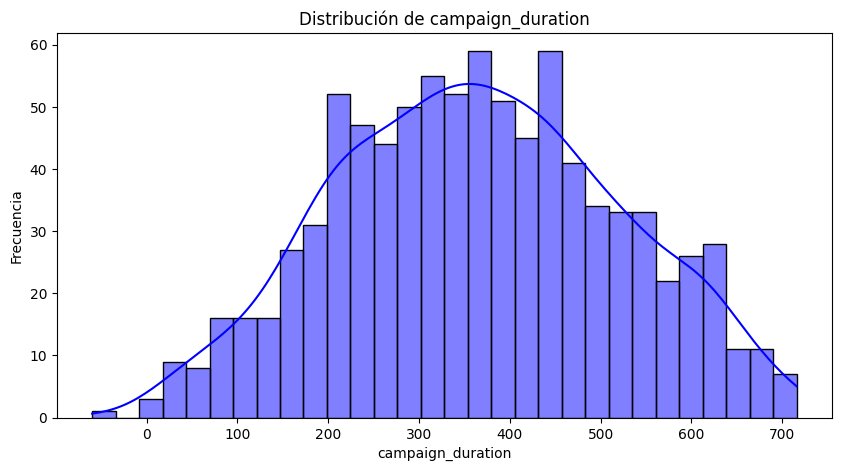

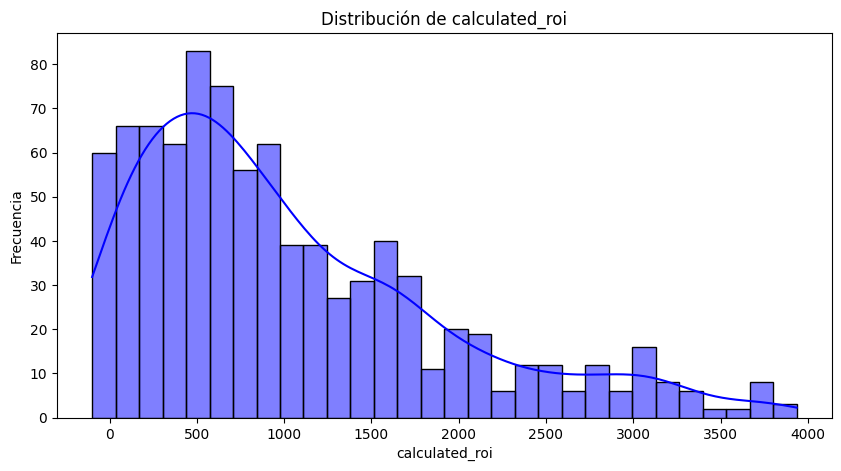

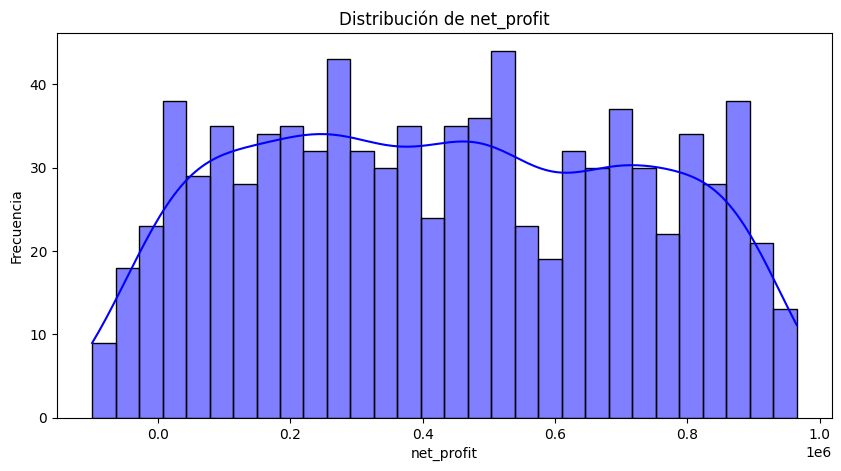

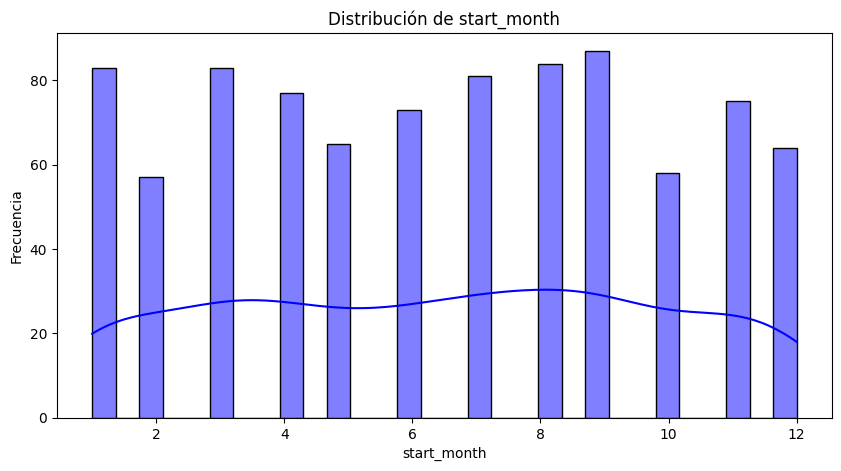

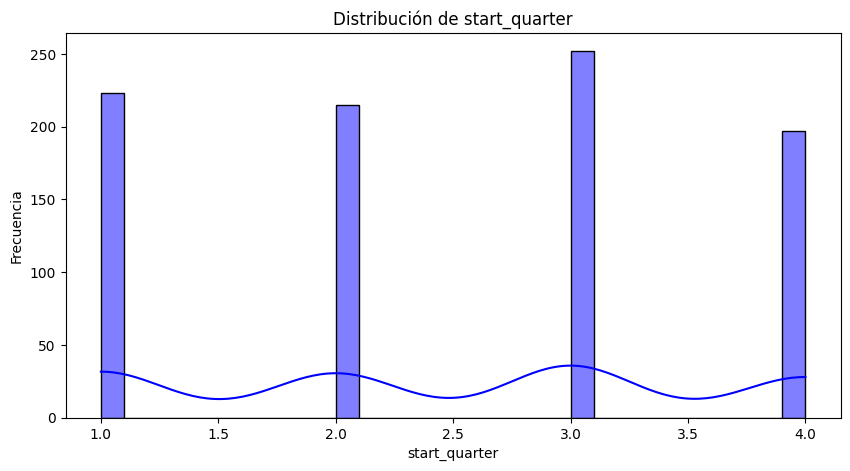

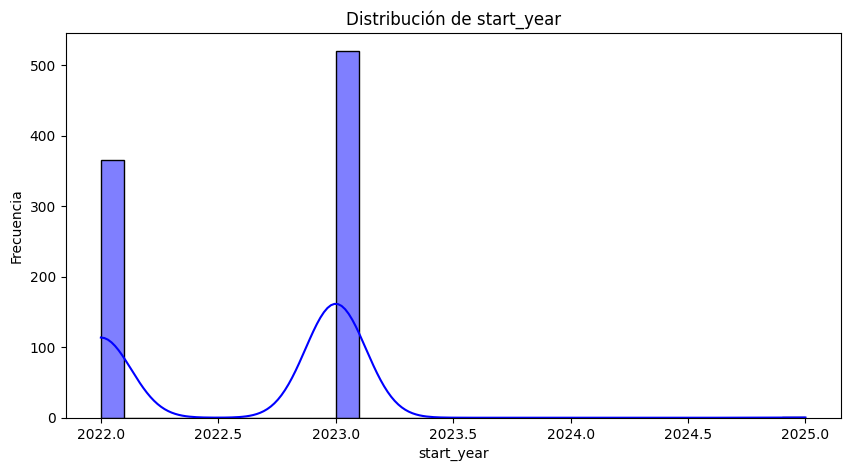

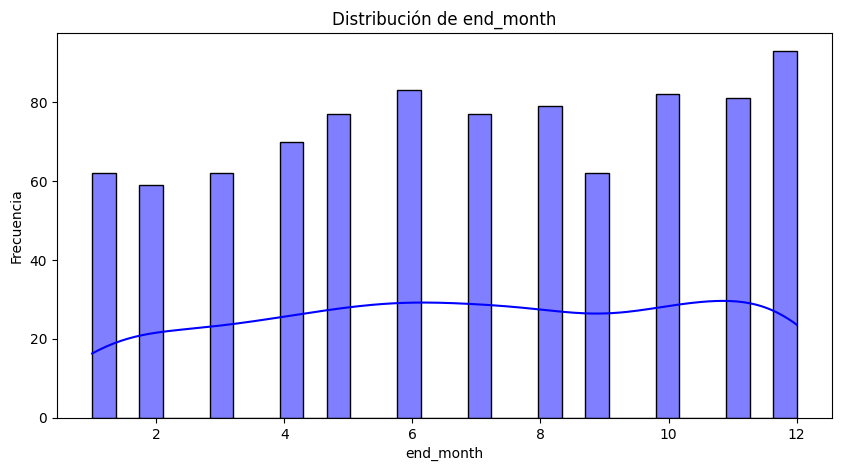

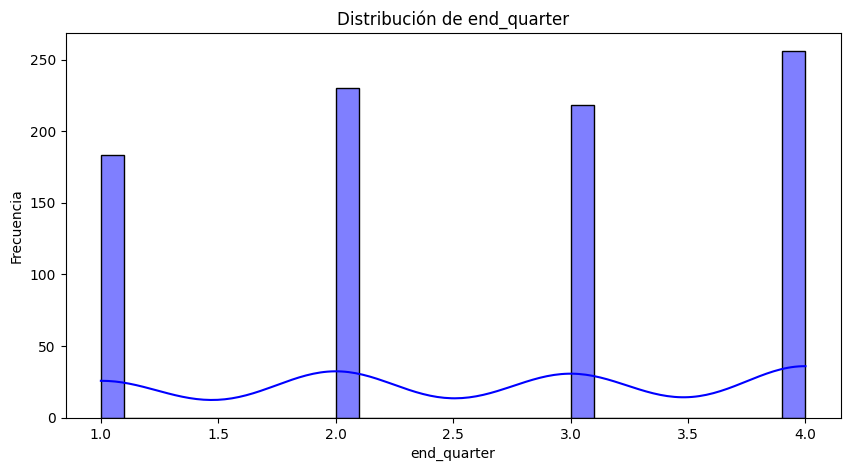

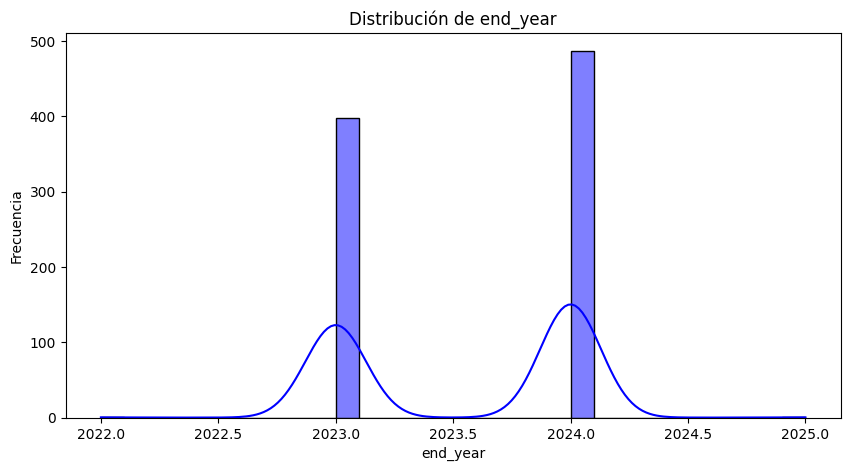

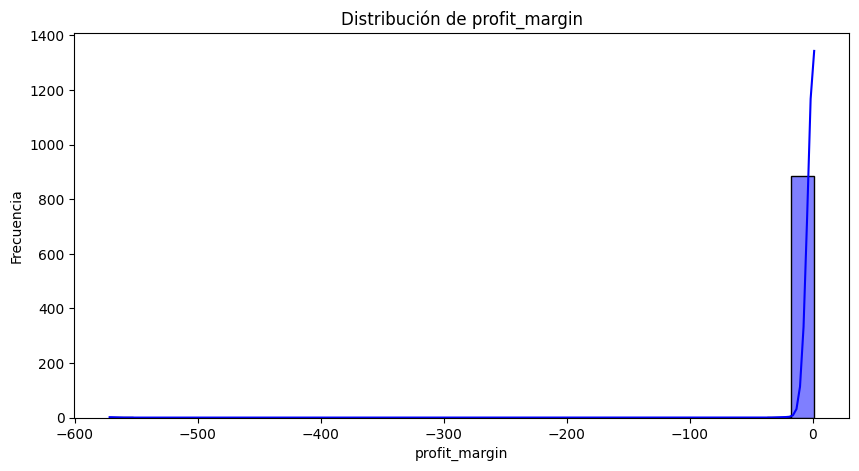

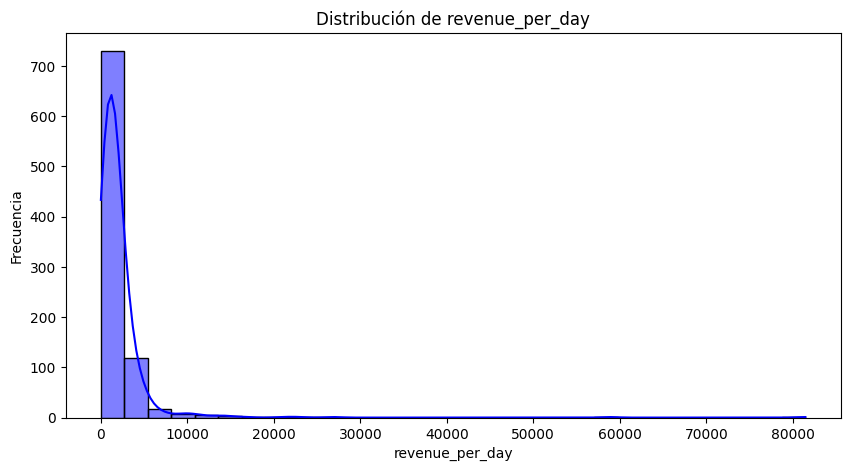

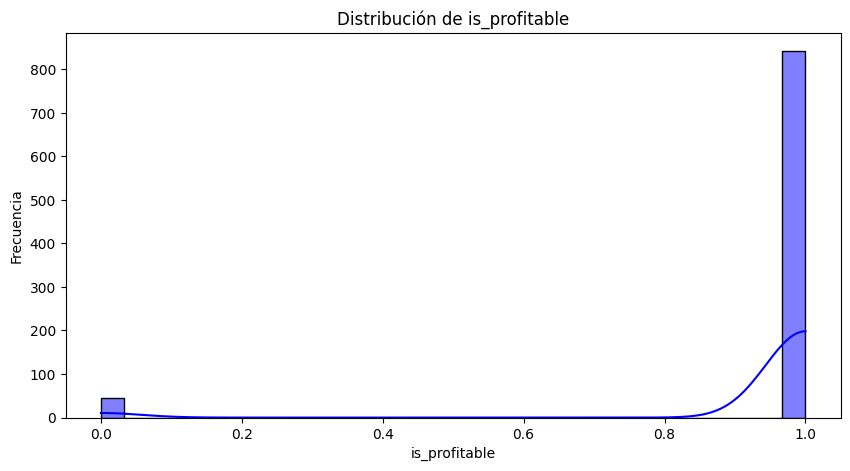

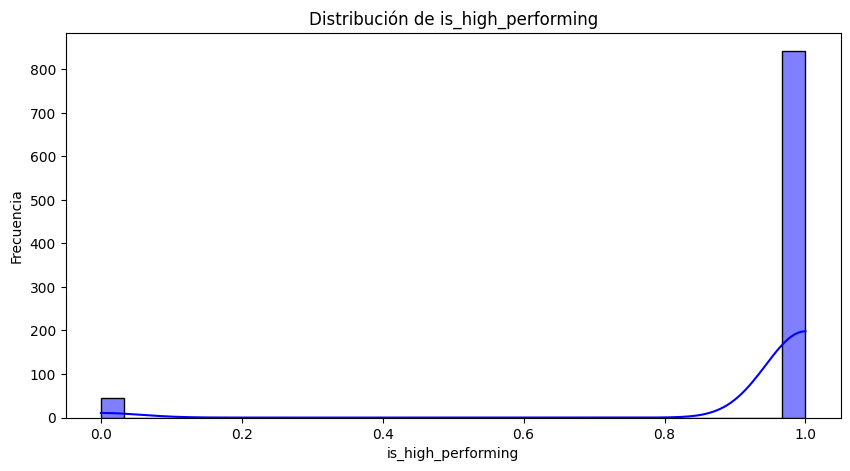

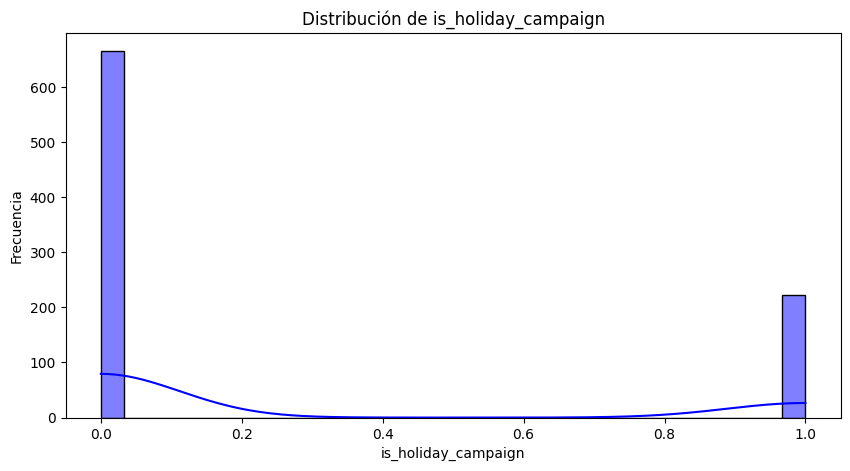

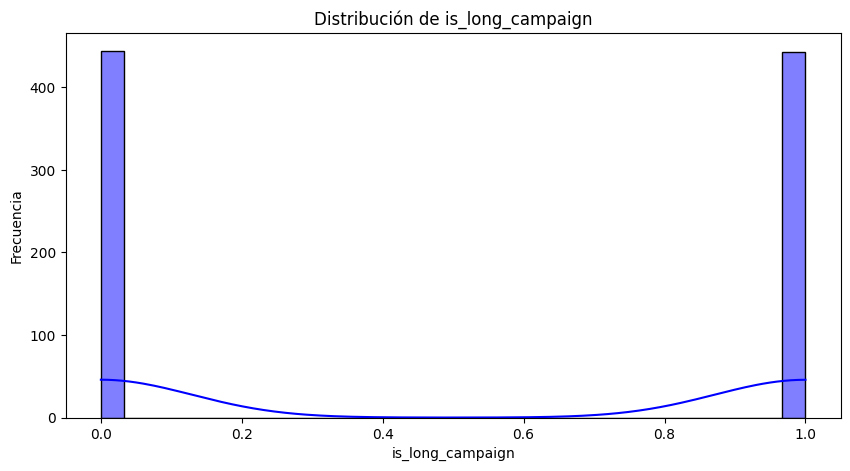

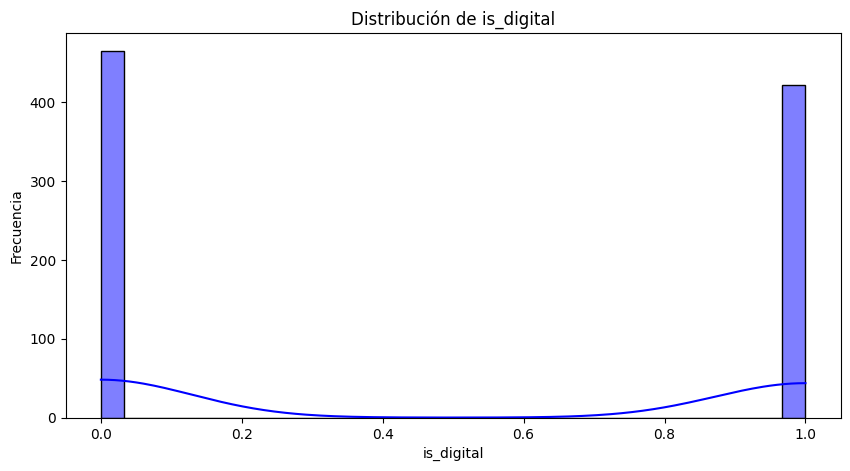

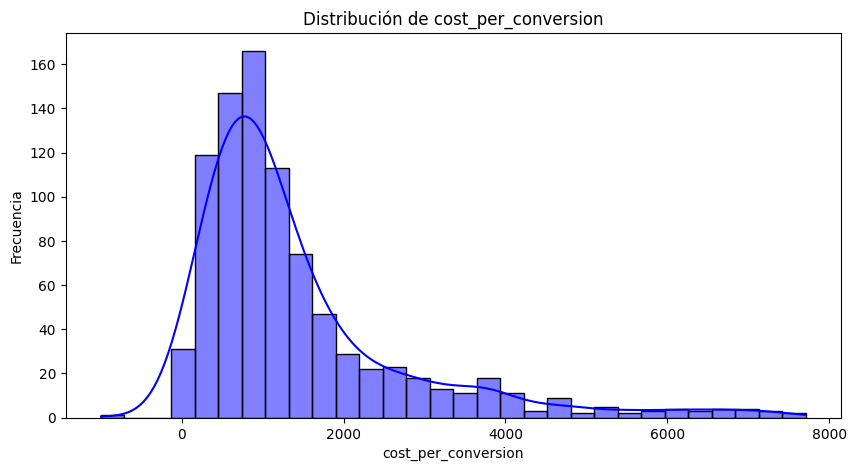

In [102]:
def plot_categorical_distribution(df_limpio, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_limpio, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df_limpio, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_limpio, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df_limpio.select_dtypes(include=['object']).columns
numerical_cols = df_limpio.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df_limpio, col)
for col in numerical_cols:
    plot_numerical_distribution(df_limpio, col)

In [103]:
def save_dataframe(df_limpio, filename, folder_path=None, index=False):
        # Asegurar que el nombre del archivo tenga extensión .csv
        if not filename.endswith('.csv'):
            filename += '.csv'
            
        # Si no se especifica carpeta, usar el directorio actual
        if folder_path is None:
            full_path = filename
        else:
            # Crear la carpeta si no existe
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
                print(f"Se creó la carpeta: {folder_path}")
                
            # Construir la ruta completa
            full_path = os.path.join(folder_path, filename)
            
        # Guardar el DataFrame
        df_limpio.to_csv(full_path, index=index)
        print(f"DataFrame guardado exitosamente en: {full_path}")
        
        return full_path
    
output_folder = r"C:\Users\Victor\Documents\GitHub\marketing\data"  
save_dataframe(df_limpio, "marketingcampaigns_clean.csv", output_folder)

DataFrame guardado exitosamente en: C:\Users\Victor\Documents\GitHub\marketing\data\marketingcampaigns_clean.csv


'C:\\Users\\Victor\\Documents\\GitHub\\marketing\\data\\marketingcampaigns_clean.csv'

## <u>Conclusiones

A lo largo de este cuaderno, se han aplicado múltiples técnicas de preprocesamiento de datos, cada una con un propósito claro y definido. Desde la inspección inicial hasta las transformaciones específicas, cada paso ha permitido preparar los datos para etapas posteriores de análisis o modelado.

Un buen preprocesamiento no solo mejora el rendimiento de los modelos, sino que también garantiza que las decisiones basadas en los datos sean más acertadas y robustas. Este notebook sirve como una guía estructurada para establecer un flujo de trabajo fiable y reproducible en proyectos de ciencia de datos.

* Se realizó una limpieza exhaustiva del dataset de campañas de marketing, corrigiendo valores nulos, erroneos y duplicados.

* Se recalculó correctamente el ROI a través de la columna 'calculated_roi', ya que los valores originales no eran fiables.

* Se identificaron y trataron outliers en variables clave como 'budget', 'revenue' y 'calculated_roi' utilizando métodos IQR y z-score.

* Se eliminaron duplicados parciales y totales, reduciendo el dataset para análisis más precisos.

* Se corrigieron errores de formato y tipo de dato en columnas como 'budget', 'conversion_rate' y fechas.

* Se crearon variables derivadas útiles como 'net_profit', 'profit_margin', 'revenue_per_day' y 'cost_per_conversion'.

* Se agregaron categorías y flags binarias para facilitar análisis por segmentos ('is_profitable', 'is_digital', etc).

* Se implementaron componentes temporales para análisis estacional (trimestres, meses, etc).

* El dataset resultante (df_limpio) proporciona ahora una base sólida para análisis y modelado de datos, con una estructura coherente y valores validados.